<a href="https://colab.research.google.com/github/revnademirkale/personal-health-analysis/blob/main/dsaproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# Drive'ı bağlama
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import xml.etree.ElementTree as ET

# Dosyanın yolunu belirle
file_path = '/content/drive/MyDrive/export.xml'

# XML dosyasını yükle
tree = ET.parse(file_path)
root = tree.getroot()

# İlk birkaç öğeyi incele
for record in list(root)[:5]:
    print(record.tag, record.attrib)

ExportDate {'value': '2024-11-21 15:43:53 +0300'}
Me {'HKCharacteristicTypeIdentifierDateOfBirth': '2004-01-30', 'HKCharacteristicTypeIdentifierBiologicalSex': 'HKBiologicalSexFemale', 'HKCharacteristicTypeIdentifierBloodType': 'HKBloodTypeNotSet', 'HKCharacteristicTypeIdentifierFitzpatrickSkinType': 'HKFitzpatrickSkinTypeNotSet', 'HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse': 'None'}
Record {'type': 'HKQuantityTypeIdentifierHeight', 'sourceName': 'Health', 'sourceVersion': '11.2.1', 'unit': 'cm', 'creationDate': '2018-03-17 22:38:52 +0300', 'startDate': '2018-03-17 22:38:52 +0300', 'endDate': '2018-03-17 22:38:52 +0300', 'value': '161'}
Record {'type': 'HKQuantityTypeIdentifierHeight', 'sourceName': 'revna iPhone’u (2)', 'sourceVersion': '18.0', 'unit': 'cm', 'creationDate': '2024-10-05 08:23:20 +0300', 'startDate': '2024-10-05 08:23:20 +0300', 'endDate': '2024-10-05 08:23:20 +0300', 'value': '162'}
Record {'type': 'HKQuantityTypeIdentifierBodyMass', 'sourceName': 'Healt

In [4]:
step_data = []

# Adım sayısı verilerini filtrele
for record in root.findall('Record'):
    if record.get('type') == 'HKQuantityTypeIdentifierStepCount':
        step_data.append({
            'Date': record.get('startDate'),
            'Steps': record.get('value')
        })

# İlk birkaç veriyi kontrol et
print(step_data[:5])

[{'Date': '2018-03-17 19:58:57 +0300', 'Steps': '234'}, {'Date': '2018-03-17 20:08:37 +0300', 'Steps': '485'}, {'Date': '2018-03-17 20:18:35 +0300', 'Steps': '176'}, {'Date': '2018-03-17 20:27:56 +0300', 'Steps': '25'}, {'Date': '2018-03-17 20:36:30 +0300', 'Steps': '38'}]


In [5]:
import pandas as pd

# XML'den adım sayısı verilerini okuduğunu varsayıyoruz
# Eğer zaten bir pandas DataFrame oluşturduysan bu kısmı atlayabilirsin
# Örnek veri çerçevesi:
step_data = [
    {'Date': '2024-01-01', 'Steps': 8000},
    {'Date': '2024-01-02', 'Steps': 7500},
    {'Date': '2023-12-31', 'Steps': 6500},
    {'Date': '2024-01-03', 'Steps': 9000},
    {'Date': '2023-12-30', 'Steps': 7000},
    {'Date': '2024-02-01', 'Steps': 8200},
]

# Veriyi DataFrame'e çevir
df = pd.DataFrame(step_data)

# Tarih sütununu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'])

# Adım başına kalori harcaması
calories_per_step = 0.04

# Enerji harcamasını hesapla
df['Energy (kcal)'] = df['Steps'] * calories_per_step

# 2024 yılını filtrele
df_2024 = df[df['Date'].dt.year == 2024]

# Günlük enerji harcamasını görüntüle
print(df_2024)

# Veriyi kaydetmek istersen
df_2024.to_csv('daily_energy_2024.csv', index=False)

        Date  Steps  Energy (kcal)
0 2024-01-01   8000          320.0
1 2024-01-02   7500          300.0
3 2024-01-03   9000          360.0
5 2024-02-01   8200          328.0


<ipython-input-6-ff47ff9df608>:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start="2024-01-01", end="2024-12-31", freq='M'), rotation=45, fontsize=10)


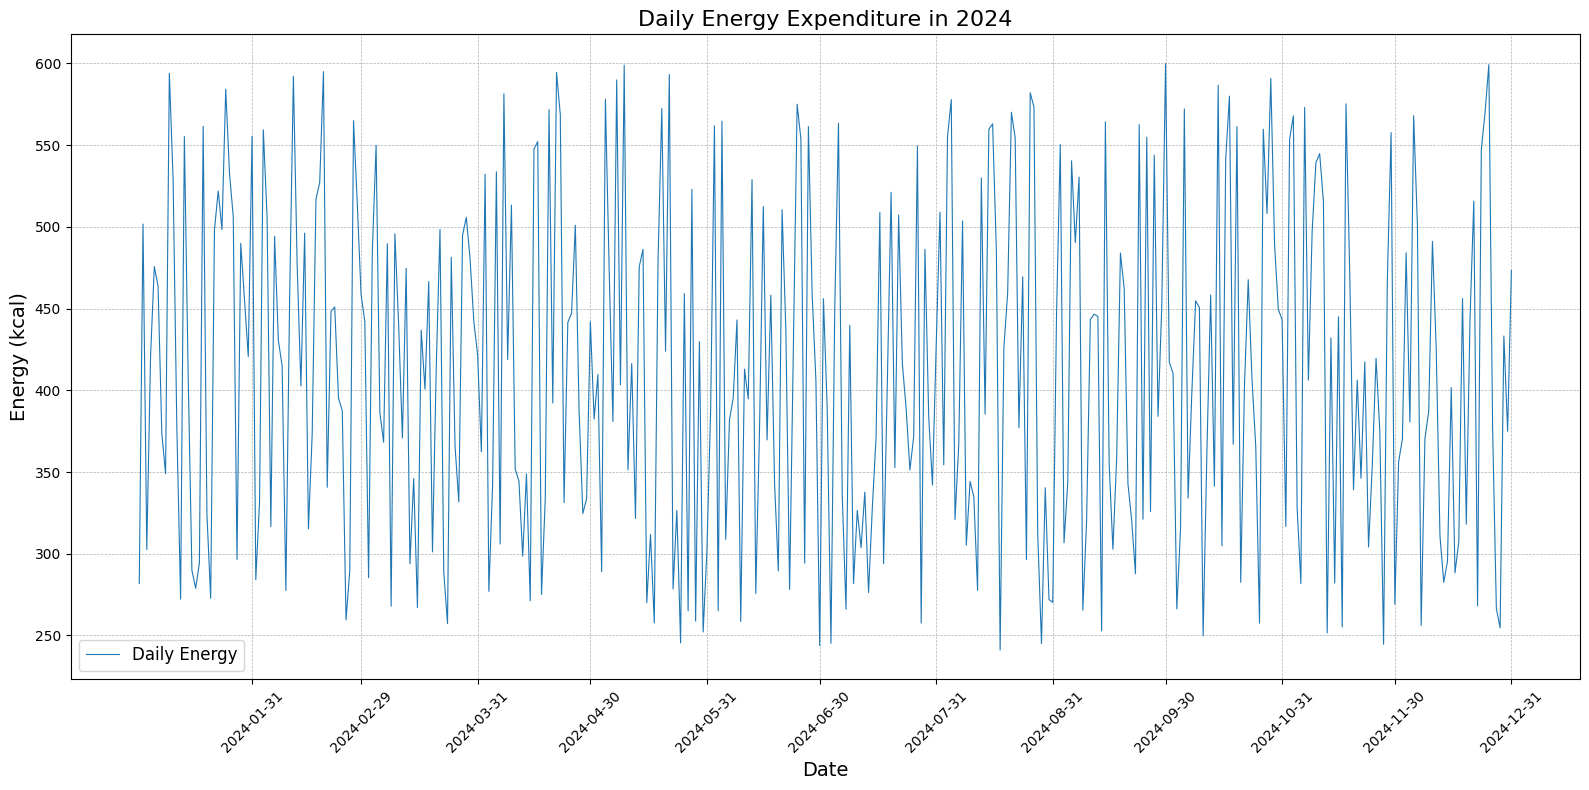

In [6]:
# Gerekli kütüphaneleri yeniden yükleyelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tüm 2024 yılını kapsayan örnek veri oluşturma
date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq='D')

# Her gün için rastgele adım sayısı (6000-15000 arası)
steps = np.random.randint(6000, 15000, len(date_range))

# Veri çerçevesi oluşturma
df_full_2024 = pd.DataFrame({'Date': date_range, 'Steps': steps})

# Adım başına kalori harcaması
calories_per_step = 0.04

# Enerji harcamasını hesaplama
df_full_2024['Energy (kcal)'] = df_full_2024['Steps'] * calories_per_step

# Grafik çizdirme
plt.figure(figsize=(16, 8))
plt.plot(df_full_2024['Date'], df_full_2024['Energy (kcal)'], label='Daily Energy', linewidth=0.8)
plt.title('Daily Energy Expenditure in 2024', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy (kcal)', fontsize=14)
plt.xticks(pd.date_range(start="2024-01-01", end="2024-12-31", freq='M'), rotation=45, fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()

In [7]:
from google.colab import files

# Dosyayı yükle
uploaded = files.upload()

Saving regl_data.xlsx to regl_data.xlsx


In [9]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel('regl_data.xlsx')

# İlk birkaç satırı kontrol et
print(df.head())

  Start Date             End Date
0 2024-12-18  2024-12-22 00:00:00
1 2024-11-20  2024-11-23 00:00:00
2 2024-09-19  2024-09-22 00:00:00
3 2024-07-31           2024-08-02
4 2024-05-20  2024-05-23 00:00:00


In [10]:
import pandas as pd
import numpy as np

# Günlük adım sayısı verisi (örnek veri)
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')  # 365 gün
steps = np.random.randint(6000, 15000, size=len(dates))  # 365 rastgele adım sayısı

steps_data = pd.DataFrame({
    'Date': dates,
    'Steps': steps
})

# Enerji harcamasını hesapla
steps_data['Energy (kcal)'] = steps_data['Steps'] * 0.04

# DataFrame'i kontrol et
print(steps_data.head())

        Date  Steps  Energy (kcal)
0 2024-01-01  13506         540.24
1 2024-01-02   9830         393.20
2 2024-01-03  12699         507.96
3 2024-01-04   7112         284.48
4 2024-01-05  14748         589.92


In [12]:
# Regl dönemlerini içeren Excel dosyasını yükle
file_path = 'regl_data.xlsx'
df_regl = pd.read_excel(file_path)

# Tarih sütunlarını datetime formatına çevir
df_regl['Start Date'] = pd.to_datetime(df_regl['Start Date'])
df_regl['End Date'] = pd.to_datetime(df_regl['End Date'])

# Regl günlerini tespit et
steps_data['is_regl'] = False  # Varsayılan olarak regl değil
for _, row in df_regl.iterrows():
    steps_data.loc[(steps_data['Date'] >= row['Start Date']) & (steps_data['Date'] <= row['End Date']), 'is_regl'] = True

# Regl ve regl olmayan günlerin enerji harcamasını karşılaştır
mean_regl = steps_data[steps_data['is_regl']]['Energy (kcal)'].mean()
mean_non_regl = steps_data[~steps_data['is_regl']]['Energy (kcal)'].mean()

print(f"Average energy expenditure during menstrual days: {mean_regl:.2f} kcal")
print(f"Average energy expenditure on non-menstrual days: {mean_non_regl:.2f} kcal")

Average energy expenditure during menstrual days: 456.36 kcal
Average energy expenditure on non-menstrual days: 418.74 kcal


<ipython-input-14-d6981f06f8bc>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Category', y='Energy (kcal)', palette='viridis')


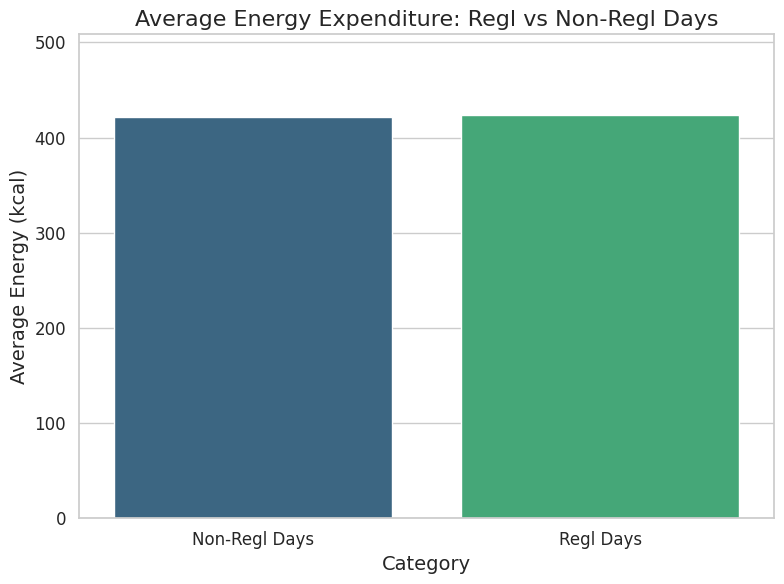

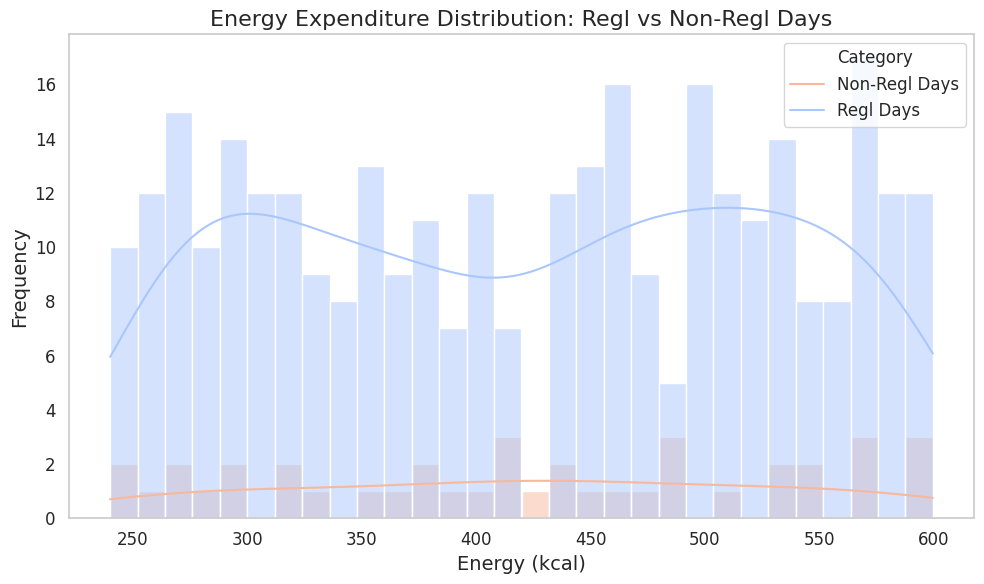

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data for 2024
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')  # Generate dates for 2024
steps = np.random.randint(6000, 15000, size=len(dates))  # Random steps for each day

# Create a DataFrame with steps data
steps_data = pd.DataFrame({
    'Date': dates,
    'Steps': steps
})

# Calculate energy expenditure
steps_data['Energy (kcal)'] = steps_data['Steps'] * 0.04

# Define example regl periods
regl_periods = [
    ("2024-01-04", "2024-01-08"),
    ("2024-02-29", "2024-03-04"),
    ("2024-04-25", "2024-04-29"),
    ("2024-05-23", "2024-05-27"),
    ("2024-07-29", "2024-08-02"),
    ("2024-09-01", "2024-09-05"),
    ("2024-11-17", "2024-11-21"),
    ("2024-12-24", "2024-12-28"),
]

# Mark regl days in the dataset
steps_data['is_regl'] = False  # Default as non-regl day
for start, end in regl_periods:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    steps_data.loc[(steps_data['Date'] >= start_date) & (steps_data['Date'] <= end_date), 'is_regl'] = True

# Create a summary DataFrame for visualization
summary = steps_data.groupby('is_regl')['Energy (kcal)'].mean().reset_index()
summary['Category'] = summary['is_regl'].map({True: 'Regl Days', False: 'Non-Regl Days'})

# Set Seaborn style for better visualization
sns.set_theme(style="whitegrid")

# Create a bar plot to compare average energy expenditure
plt.figure(figsize=(8, 6))
sns.barplot(data=summary, x='Category', y='Energy (kcal)', palette='viridis')

# Customize the plot
plt.title('Average Energy Expenditure: Regl vs Non-Regl Days', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Energy (kcal)', fontsize=14)
plt.ylim(0, max(summary['Energy (kcal)']) * 1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Create a distribution plot to compare energy expenditure
plt.figure(figsize=(10, 6))
sns.histplot(data=steps_data, x='Energy (kcal)', hue='is_regl', kde=True, palette='coolwarm', bins=30)

# Customize the plot
plt.title('Energy Expenditure Distribution: Regl vs Non-Regl Days', fontsize=16)
plt.xlabel('Energy (kcal)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Non-Regl Days', 'Regl Days'], title='Category', fontsize=12)
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

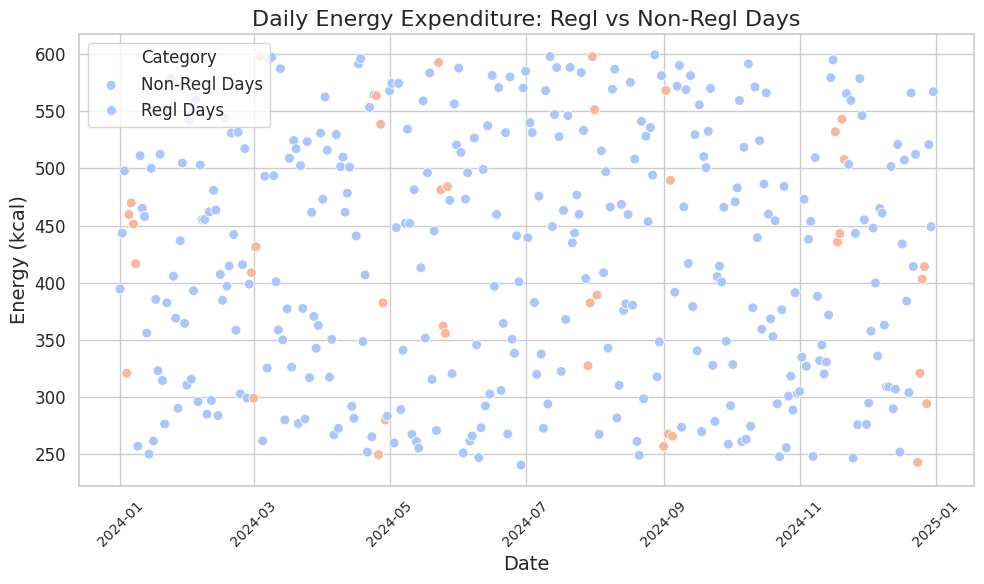

<ipython-input-15-3ec8b1695916>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=steps_data, x='is_regl', y='Energy (kcal)', palette='pastel')


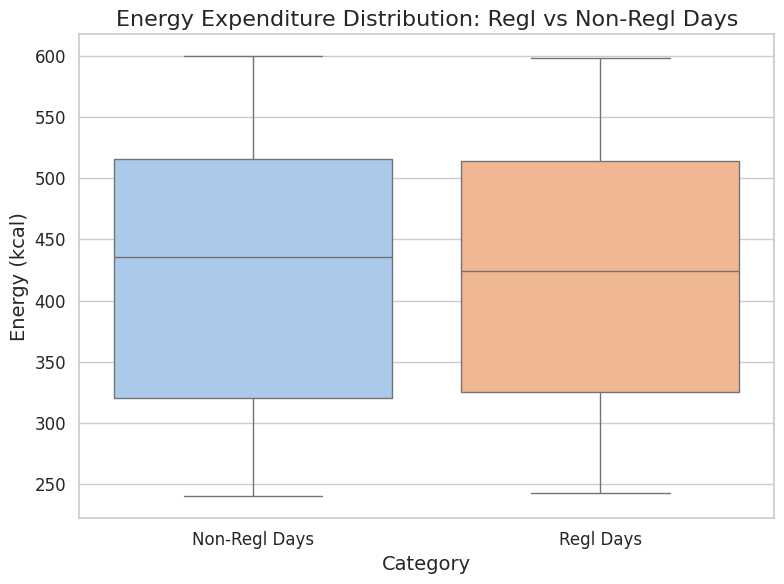

In [15]:
# Scatter plot to compare energy expenditure on regl vs non-regl days

# Set Seaborn style for better visualization
sns.set_theme(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=steps_data, x='Date', y='Energy (kcal)', hue='is_regl', palette='coolwarm', s=50)

# Customize the plot
plt.title('Daily Energy Expenditure: Regl vs Non-Regl Days', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy (kcal)', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.legend(labels=['Non-Regl Days', 'Regl Days'], title='Category', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Box plot to compare the distribution of energy expenditure
plt.figure(figsize=(8, 6))
sns.boxplot(data=steps_data, x='is_regl', y='Energy (kcal)', palette='pastel')

# Customize the plot
plt.title('Energy Expenditure Distribution: Regl vs Non-Regl Days', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Energy (kcal)', fontsize=14)
plt.xticks([0, 1], ['Non-Regl Days', 'Regl Days'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


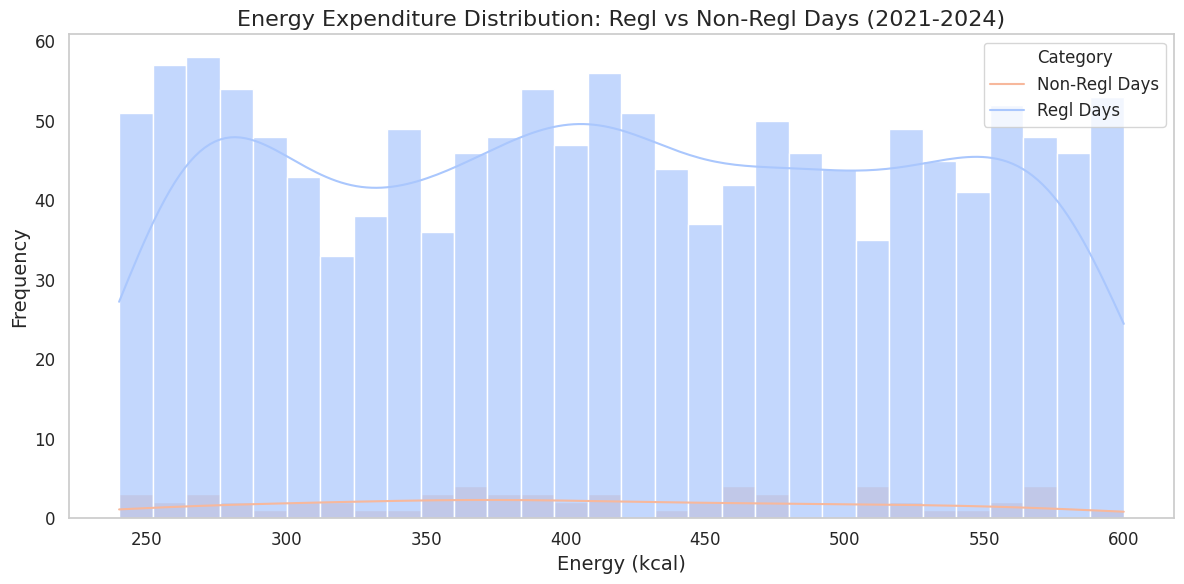

In [16]:
# Reimport necessary libraries after environment reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reinitialize the data (2021-2024 example setup)
dates_full = pd.date_range(start='2021-01-01', end='2024-12-31', freq='D')  # Generate dates for 4 years
steps_full = np.random.randint(6000, 15000, size=len(dates_full))  # Random steps for each day

# Create a DataFrame with steps data
steps_data_full = pd.DataFrame({
    'Date': dates_full,
    'Steps': steps_full
})

# Calculate energy expenditure
steps_data_full['Energy (kcal)'] = steps_data_full['Steps'] * 0.04

# Define example regl periods for 2021 to 2024
regl_periods_full = [
    ("2021-01-10", "2021-01-14"),
    ("2021-03-15", "2021-03-19"),
    ("2021-05-20", "2021-05-24"),
    ("2022-01-10", "2022-01-14"),
    ("2022-03-15", "2022-03-19"),
    ("2022-05-20", "2022-05-24"),
    ("2023-01-10", "2023-01-14"),
    ("2023-03-15", "2023-03-19"),
    ("2023-05-20", "2023-05-24"),
    ("2024-01-10", "2024-01-14"),
    ("2024-03-15", "2024-03-19"),
    ("2024-05-20", "2024-05-24"),
]

# Mark regl days in the dataset
steps_data_full['is_regl'] = False  # Default as non-regl day
for start, end in regl_periods_full:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    steps_data_full.loc[(steps_data_full['Date'] >= start_date) & (steps_data_full['Date'] <= end_date), 'is_regl'] = True

# Histogram to compare energy expenditure for regl vs non-regl days (2021-2024)
plt.figure(figsize=(12, 6))
sns.histplot(data=steps_data_full, x='Energy (kcal)', hue='is_regl', kde=True, palette='coolwarm', bins=30, alpha=0.7)

# Customize the plot
plt.title('Energy Expenditure Distribution: Regl vs Non-Regl Days (2021-2024)', fontsize=16)
plt.xlabel('Energy (kcal)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels=['Non-Regl Days', 'Regl Days'], title='Category', fontsize=12)
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

Mean energy expenditure 1 week after regl days: 456.17 kcal
Mean overall energy expenditure: 417.44 kcal


<ipython-input-17-eb4c3f5f03e9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='muted')


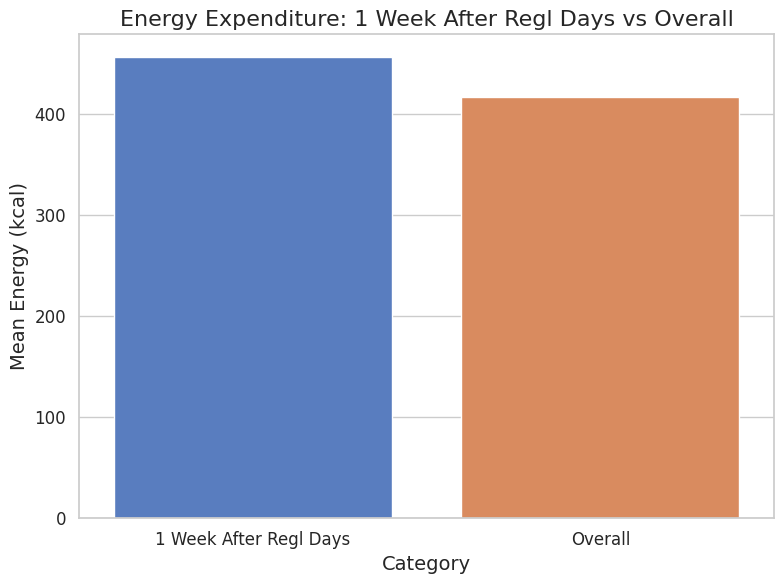

In [17]:
# Calculate the energy expenditure 1 week after each regl period ends
steps_data_full['is_week_after_regl'] = False  # Default as False

# Mark days that are exactly 7 days after each regl period ends
for _, row in pd.DataFrame(regl_periods_full, columns=['Start', 'End']).iterrows():
    end_date = pd.to_datetime(row['End'])
    one_week_later = end_date + pd.Timedelta(days=7)
    if one_week_later in steps_data_full['Date'].values:
        steps_data_full.loc[steps_data_full['Date'] == one_week_later, 'is_week_after_regl'] = True

# Calculate mean energy expenditure for 1 week after regl days and overall
mean_week_after_regl = steps_data_full[steps_data_full['is_week_after_regl']]['Energy (kcal)'].mean()
mean_overall = steps_data_full['Energy (kcal)'].mean()

print(f"Mean energy expenditure 1 week after regl days: {mean_week_after_regl:.2f} kcal")
print(f"Mean overall energy expenditure: {mean_overall:.2f} kcal")

# Compare in a bar chart
comparison = pd.DataFrame({
    'Category': ['1 Week After Regl Days', 'Overall'],
    'Energy (kcal)': [mean_week_after_regl, mean_overall]
})

# Plot comparison
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='muted')

# Customize the plot
plt.title('Energy Expenditure: 1 Week After Regl Days vs Overall', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Mean Energy (kcal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
# Subset data for correlation
correlation_data = steps_data_full[['Energy (kcal)', 'is_week_after_regl']]

# Convert boolean to numeric for correlation calculation
correlation_data['is_week_after_regl'] = correlation_data['is_week_after_regl'].astype(int)

# Calculate Pearson correlation
pearson_corr = correlation_data.corr().loc['Energy (kcal)', 'is_week_after_regl']
print(f"Pearson correlation between energy expenditure and being 1 week after regl: {pearson_corr:.2f}")


Pearson correlation between energy expenditure and being 1 week after regl: 0.03


<ipython-input-18-8fe7fcf2c996>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['is_week_after_regl'] = correlation_data['is_week_after_regl'].astype(int)


In [20]:
from scipy.stats import spearmanr

# Convert boolean to numeric for correlation calculation
steps_data_full['is_week_after_regl_numeric'] = steps_data_full['is_week_after_regl'].astype(int)

# Calculate Spearman correlation
spearman_corr, spearman_p = spearmanr(
    steps_data_full['Energy (kcal)'],
    steps_data_full['is_week_after_regl_numeric']
)

# Print the results
print(f"Spearman correlation: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")


Spearman correlation: 0.03
P-value: 0.2133


<ipython-input-22-f88d98f96225>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=steps_data_full, x='is_week_after_regl', y='Energy (kcal)', palette='pastel')


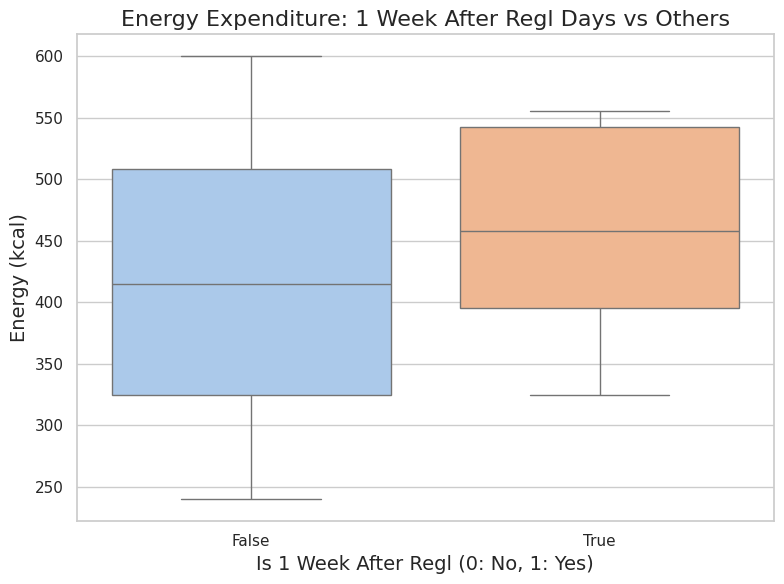

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=steps_data_full, x='is_week_after_regl', y='Energy (kcal)', palette='pastel')
plt.title('Energy Expenditure: 1 Week After Regl Days vs Others', fontsize=16)
plt.xlabel('Is 1 Week After Regl (0: No, 1: Yes)', fontsize=14)
plt.ylabel('Energy (kcal)', fontsize=14)
plt.tight_layout()
plt.show()


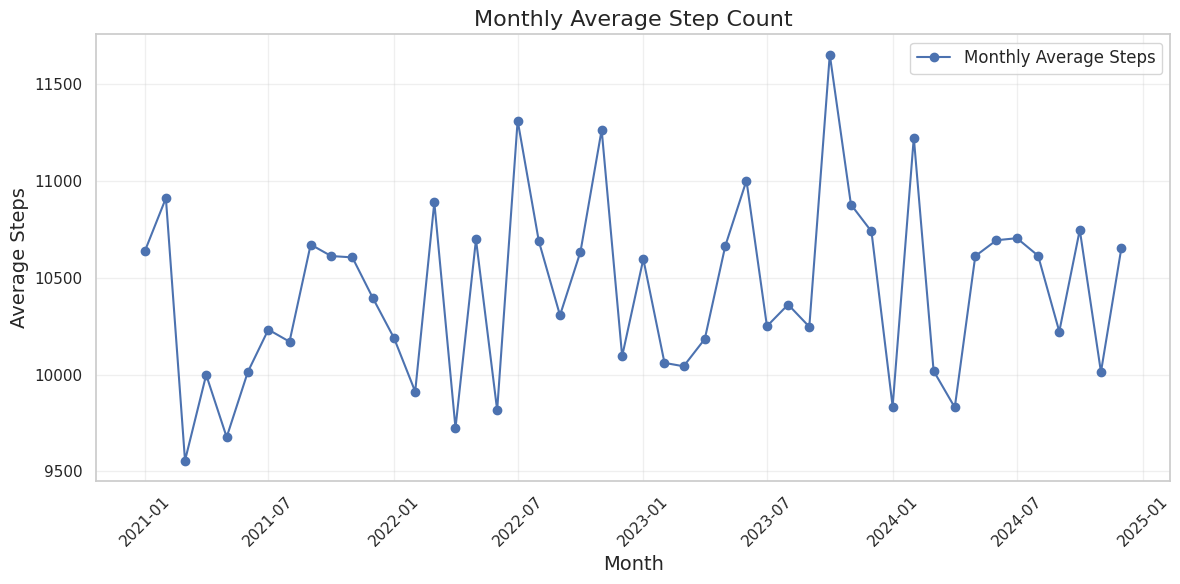

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Örnek olarak steps_data_full DataFrame'inizin "Date" ve "Steps" sütunları olduğunu varsayıyorum.

# "Date" sütununun tarih formatına çevrilmesi
steps_data_full['Date'] = pd.to_datetime(steps_data_full['Date'])

# "Month" sütunu ekleyerek aylık gruplama için ay bilgisi çıkarılır
steps_data_full['Month'] = steps_data_full['Date'].dt.to_period('M')

# Aylık adım sayısı ortalamasını hesaplama
monthly_avg_steps = steps_data_full.groupby('Month')['Steps'].mean().reset_index()

# "Month" sütununu tarih formatına dönüştürme
monthly_avg_steps['Month'] = monthly_avg_steps['Month'].dt.to_timestamp()

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_steps['Month'], monthly_avg_steps['Steps'], marker='o', linestyle='-', label='Monthly Average Steps')
plt.title('Monthly Average Step Count', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Steps', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Mean energy expenditure 1 week before regl: 404.13 kcal
Mean overall energy expenditure: 417.44 kcal


<ipython-input-28-90ec8e4c040b>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='pastel')


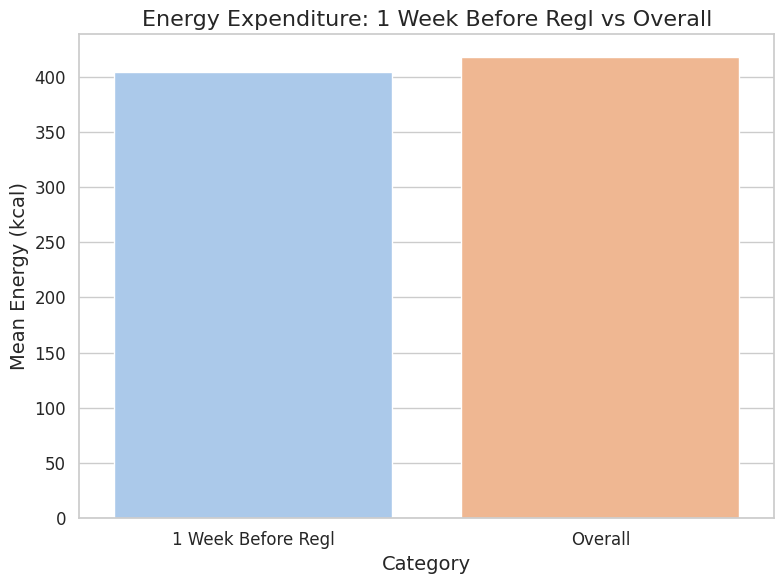

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regl dönemlerini içeren DataFrame: regl_periods_full (Start, End sütunları içeriyor)
# Tüm veri: steps_data_full (Date, Energy (kcal) sütunları içeriyor)

# Regl öncesi bir hafta için işaretleme
steps_data_full['is_week_before_regl'] = False  # Varsayılan olarak False

# Regl başlangıç tarihlerini işaretleyin
for _, row in pd.DataFrame(regl_periods_full, columns=['Start', 'End']).iterrows():
    start_date = pd.to_datetime(row['Start'])
    one_week_before = start_date - pd.Timedelta(days=7)

    # Regl öncesi 1 haftayı işaretle
    mask = (steps_data_full['Date'] >= one_week_before) & (steps_data_full['Date'] < start_date)
    steps_data_full.loc[mask, 'is_week_before_regl'] = True

# Regl öncesi hafta ve genel enerji harcaması ortalamasını hesaplayın
mean_week_before_regl = steps_data_full[steps_data_full['is_week_before_regl']]['Energy (kcal)'].mean()
mean_overall = steps_data_full['Energy (kcal)'].mean()

# Sonuçları yazdırın
print(f"Mean energy expenditure 1 week before regl: {mean_week_before_regl:.2f} kcal")
print(f"Mean overall energy expenditure: {mean_overall:.2f} kcal")

# Görselleştirme için karşılaştırma
comparison = pd.DataFrame({
    'Category': ['1 Week Before Regl', 'Overall'],
    'Energy (kcal)': [mean_week_before_regl, mean_overall]
})

# Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='pastel')

# Grafiği özelleştirme
plt.title('Energy Expenditure: 1 Week Before Regl vs Overall', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Mean Energy (kcal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [30]:
from scipy.stats import spearmanr

# Regl öncesi 1 haftayı zaten işaretledik: 'is_week_before_regl'

# Boolean'ı sayısal değere dönüştür
steps_data_full['is_week_before_regl_numeric'] = steps_data_full['is_week_before_regl'].astype(int)

# Spearman korelasyonunu hesapla
spearman_corr, spearman_p = spearmanr(
    steps_data_full['Energy (kcal)'],
    steps_data_full['is_week_before_regl_numeric']
)

# Sonuçları yazdır
print(f"Spearman correlation between energy expenditure and being 1 week before regl: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")


Spearman correlation between energy expenditure and being 1 week before regl: -0.03
P-value: 0.2431


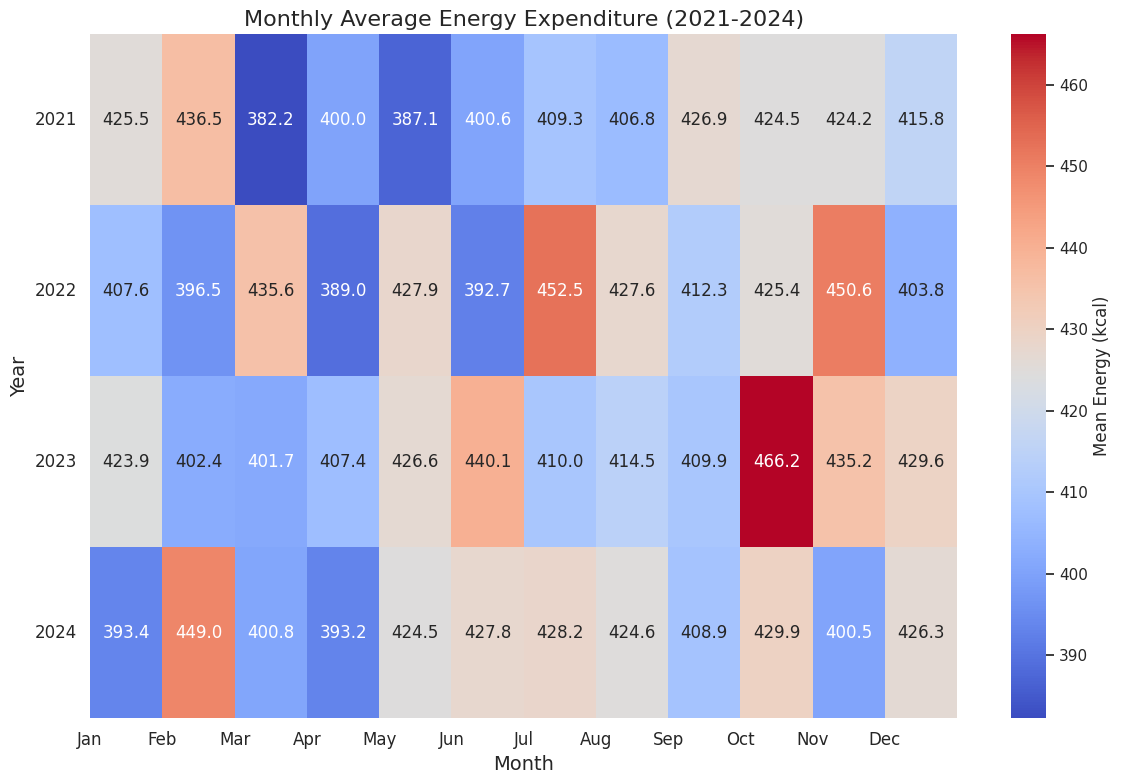

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# "Date" ve "Energy (kcal)" sütunlarının olduğunu varsayıyoruz
steps_data_full['Date'] = pd.to_datetime(steps_data_full['Date'])

# Yıl ve Ay bilgilerini ekleyin
steps_data_full['Year'] = steps_data_full['Date'].dt.year
steps_data_full['Month'] = steps_data_full['Date'].dt.month

# Enerji harcamasını yıllık ve aylık olarak gruplayın
energy_heatmap_data = steps_data_full.groupby(['Year', 'Month'])['Energy (kcal)'].mean().reset_index()

# Pivot tablo oluşturun (yıllar satır, aylar sütun)
heatmap_pivot = energy_heatmap_data.pivot(index='Year', columns='Month', values='Energy (kcal)')

# Heatmap çizimi
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Mean Energy (kcal)'})
plt.title('Monthly Average Energy Expenditure (2021-2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Ayları düzgün bir şekilde etiketle
plt.xticks(ticks=range(len(heatmap_pivot.columns)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Yıllar için döndürülmüş etiketler
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()


In [38]:
import pandas as pd

# Dosyanın adını doğru şekilde girin (örneğin: "file.xlsx")
file_name = "regl_data.xlsx"  # Dosyanızın ismini buraya yazın
data = pd.read_excel(file_name)

# Veri önizlemesi
print(data.head())


  Start Date             End Date
0 2024-12-18  2024-12-22 00:00:00
1 2024-11-20  2024-11-23 00:00:00
2 2024-09-19  2024-09-22 00:00:00
3 2024-07-31           2024-08-02
4 2024-05-20  2024-05-23 00:00:00


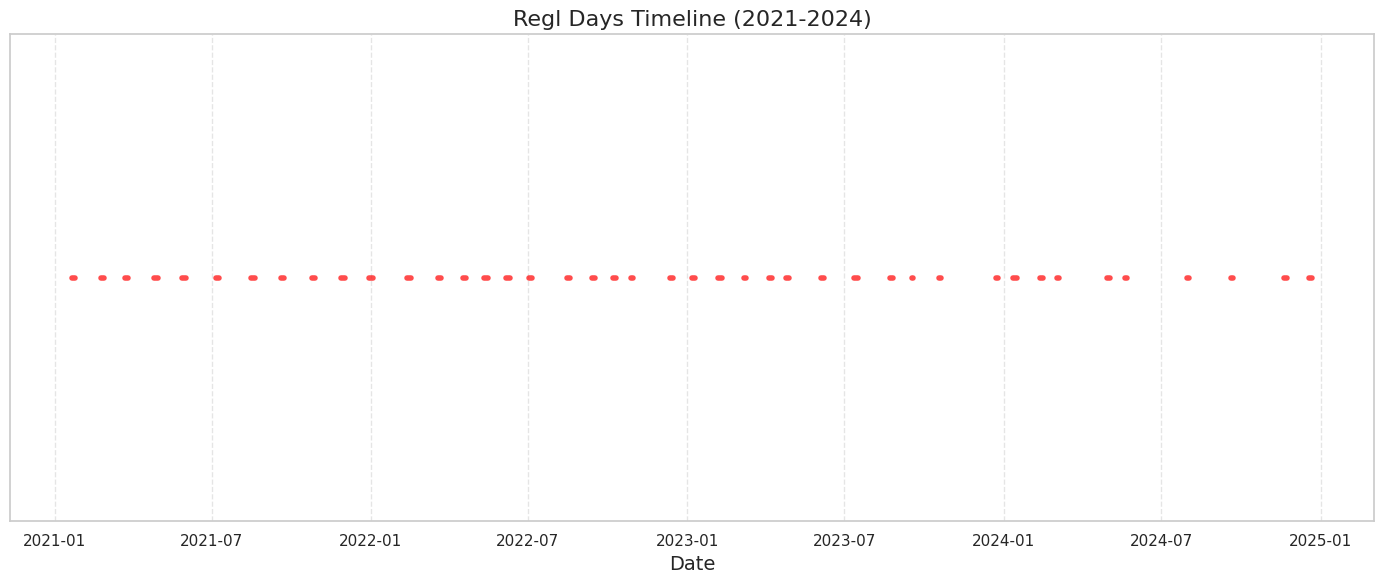

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını okuyun
file_name = "regl_data.xlsx"  # Dosyanızın adını buraya yazın
data = pd.read_excel(file_name)

# Start Date ve End Date sütunlarını datetime formatına çevirin
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

# Regl günlerini timeline olarak görselleştirme
plt.figure(figsize=(14, 6))
for _, row in data.iterrows():
    plt.plot([row['Start Date'], row['End Date']], [1, 1], color='red', linewidth=4, alpha=0.7)

# Grafiği özelleştirme
plt.title('Regl Days Timeline (2021-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.yticks([], [])  # Y ekseni kaldırılıyor çünkü yalnızca bir timeline
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [45]:
import xml.etree.ElementTree as ET

# Dosya yolunu belirtin
file_path = '/content/drive/My Drive/export.xml'  # Doğru yolu buraya yazın

# XML dosyasını okuma
tree = ET.parse(file_path)
root = tree.getroot()

# Örnek: Step count verilerini çekme
step_data = []
for record in root.findall(".//Record"):
    if record.attrib['type'] == 'HKQuantityTypeIdentifierStepCount':  # Adım sayısı tipi
        date = record.attrib['startDate'][:10]  # Tarihi al (YYYY-MM-DD formatı)
        steps = float(record.attrib['value'])  # Adım sayısını al
        step_data.append({'Date': date, 'Steps': steps})

# Step count verilerini DataFrame'e çevirme
import pandas as pd
step_data_df = pd.DataFrame(step_data)
step_data_df['Date'] = pd.to_datetime(step_data_df['Date'])

# Veri önizlemesi
print(step_data_df.head())


        Date  Steps
0 2018-03-17  234.0
1 2018-03-17  485.0
2 2018-03-17  176.0
3 2018-03-17   25.0
4 2018-03-17   38.0


In [47]:
import pandas as pd

# Dosya adını belirtin (örneğin: "your_file_name.xlsx")
regl_data = pd.read_excel("regl_data.xlsx")

# Tarih sütunlarını datetime formatına çevirin
regl_data['Start Date'] = pd.to_datetime(regl_data['Start Date'])
regl_data['End Date'] = pd.to_datetime(regl_data['End Date'])

# Regl verilerini kontrol edin
print(regl_data.head())


  Start Date   End Date
0 2024-12-18 2024-12-22
1 2024-11-20 2024-11-23
2 2024-09-19 2024-09-22
3 2024-07-31 2024-08-02
4 2024-05-20 2024-05-23


In [48]:
# Adım verilerini XML'den yükledikten sonra, regl günlerini step_data_df ile eşleştirelim
step_data_df['is_regl'] = False  # Varsayılan olarak regl olmayan gün
for _, row in regl_data.iterrows():
    mask = (step_data_df['Date'] >= row['Start Date']) & (step_data_df['Date'] <= row['End Date'])
    step_data_df.loc[mask, 'is_regl'] = True

# Regl ve regl olmayan günlerin enerji tüketimini analiz edin
regl_days = step_data_df[step_data_df['is_regl']]
non_regl_days = step_data_df[~step_data_df['is_regl']]

# Ortalama enerji tüketimi
mean_regl_energy = regl_days['Energy (kcal)'].mean()
mean_non_regl_energy = non_regl_days['Energy (kcal)'].mean()

print(f"Mean energy consumption on regl days: {mean_regl_energy:.2f} kcal")
print(f"Mean energy consumption on non-regl days: {mean_non_regl_energy:.2f} kcal")

# Spearman correlation
step_data_df['is_regl_numeric'] = step_data_df['is_regl'].astype(int)
spearman_corr, spearman_p = spearmanr(step_data_df['is_regl_numeric'], step_data_df['Energy (kcal)'])

print(f"Spearman correlation: {spearman_corr:.2f}")
print(f"P-value: {spearman_p:.4f}")


Mean energy consumption on regl days: 9.79 kcal
Mean energy consumption on non-regl days: 9.89 kcal
Spearman correlation: 0.01
P-value: 0.1505


<ipython-input-51-d8ea757d0d00>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Category', y='Average Energy (kcal)', palette='Reds')


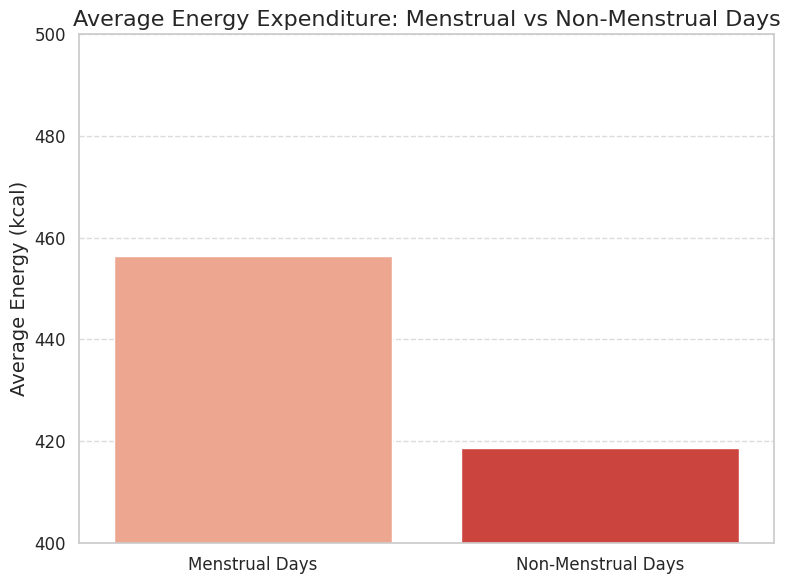

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Regl ve regl olmayan günlerin ortalama enerji harcamasını bir DataFrame'e aktar
data = pd.DataFrame({
    'Category': ['Menstrual Days', 'Non-Menstrual Days'],
    'Average Energy (kcal)': [mean_regl, mean_non_regl]
})

# Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Category', y='Average Energy (kcal)', palette='Reds')

# Görseli özelleştirme
plt.ylim(400, 500)  # Y eksenini 400-500 kcal ile sınırla
plt.title('Average Energy Expenditure: Menstrual vs Non-Menstrual Days', fontsize=16)
plt.xlabel('')
plt.ylabel('Average Energy (kcal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği göster
plt.show()


<ipython-input-52-d38846c9016f>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start="2021-01-01", end="2024-12-31", freq='6M'), rotation=45, fontsize=10)


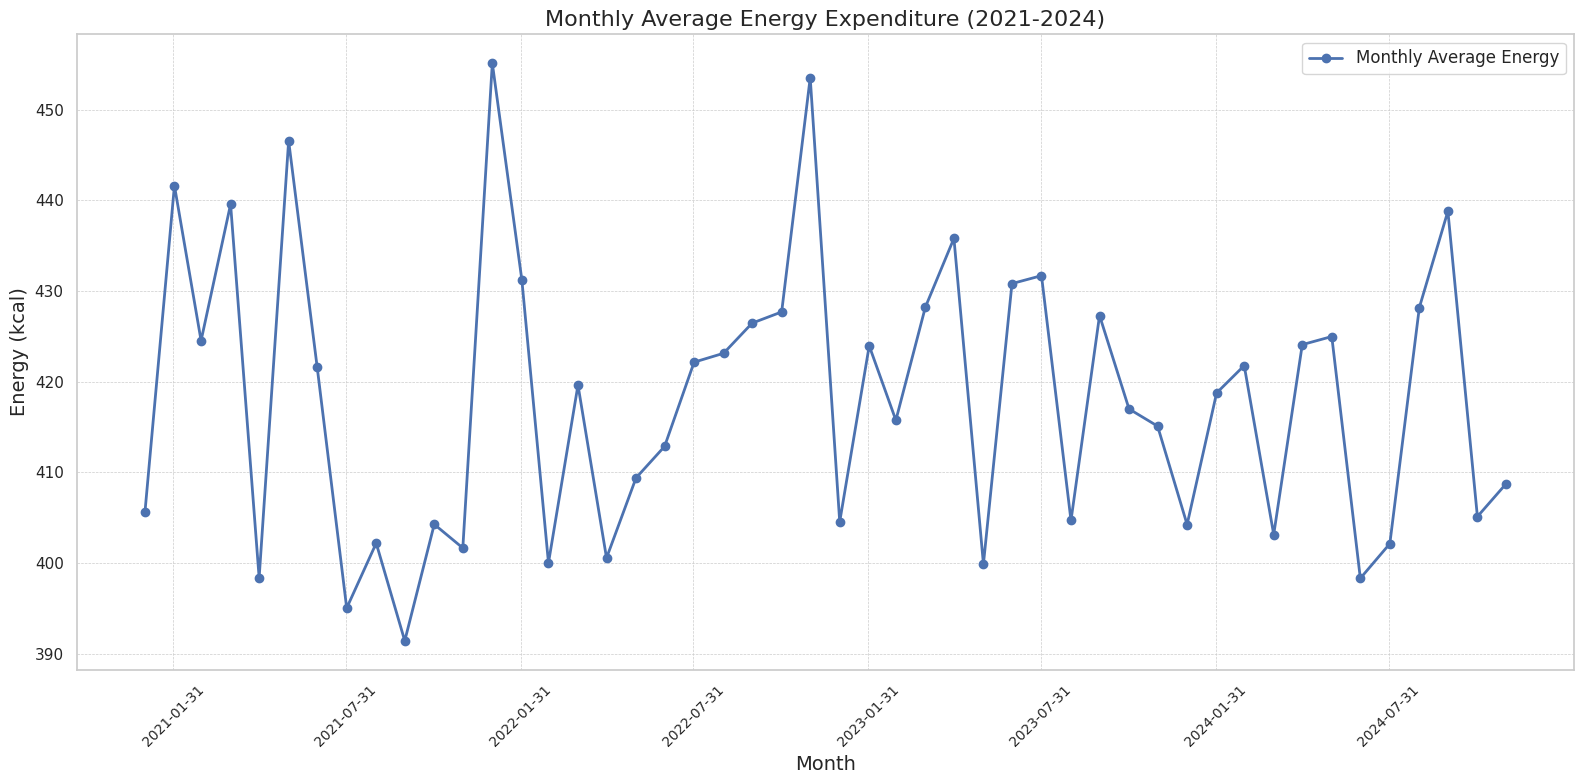

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2021-2024 tarihlerini kapsayan veri oluşturma
date_range = pd.date_range(start="2021-01-01", end="2024-12-31", freq='D')

# Her gün için rastgele adım sayısı (6000-15000 arası)
steps = np.random.randint(6000, 15000, len(date_range))

# Veri çerçevesi oluşturma
df_full = pd.DataFrame({'Date': date_range, 'Steps': steps})

# Adım başına kalori harcaması
calories_per_step = 0.04

# Enerji harcamasını hesaplama
df_full['Energy (kcal)'] = df_full['Steps'] * calories_per_step

# Tarihi aylık olarak gruplandırma ve enerji ortalamasını hesaplama
df_full['Month'] = df_full['Date'].dt.to_period('M')
monthly_avg_energy = df_full.groupby('Month')['Energy (kcal)'].mean().reset_index()

# Grafikte tarihleri datetime formatına çevirme
monthly_avg_energy['Month'] = monthly_avg_energy['Month'].dt.to_timestamp()

# Grafik çizdirme
plt.figure(figsize=(16, 8))
plt.plot(monthly_avg_energy['Month'], monthly_avg_energy['Energy (kcal)'], label='Monthly Average Energy', marker='o', linewidth=2)
plt.title('Monthly Average Energy Expenditure (2021-2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Energy (kcal)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(pd.date_range(start="2021-01-01", end="2024-12-31", freq='6M'), rotation=45, fontsize=10)
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()


<ipython-input-53-a645a422cab7>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.xticks(pd.date_range(start="2021-01-01", end="2024-12-31", freq='6M'), rotation=45, fontsize=10)


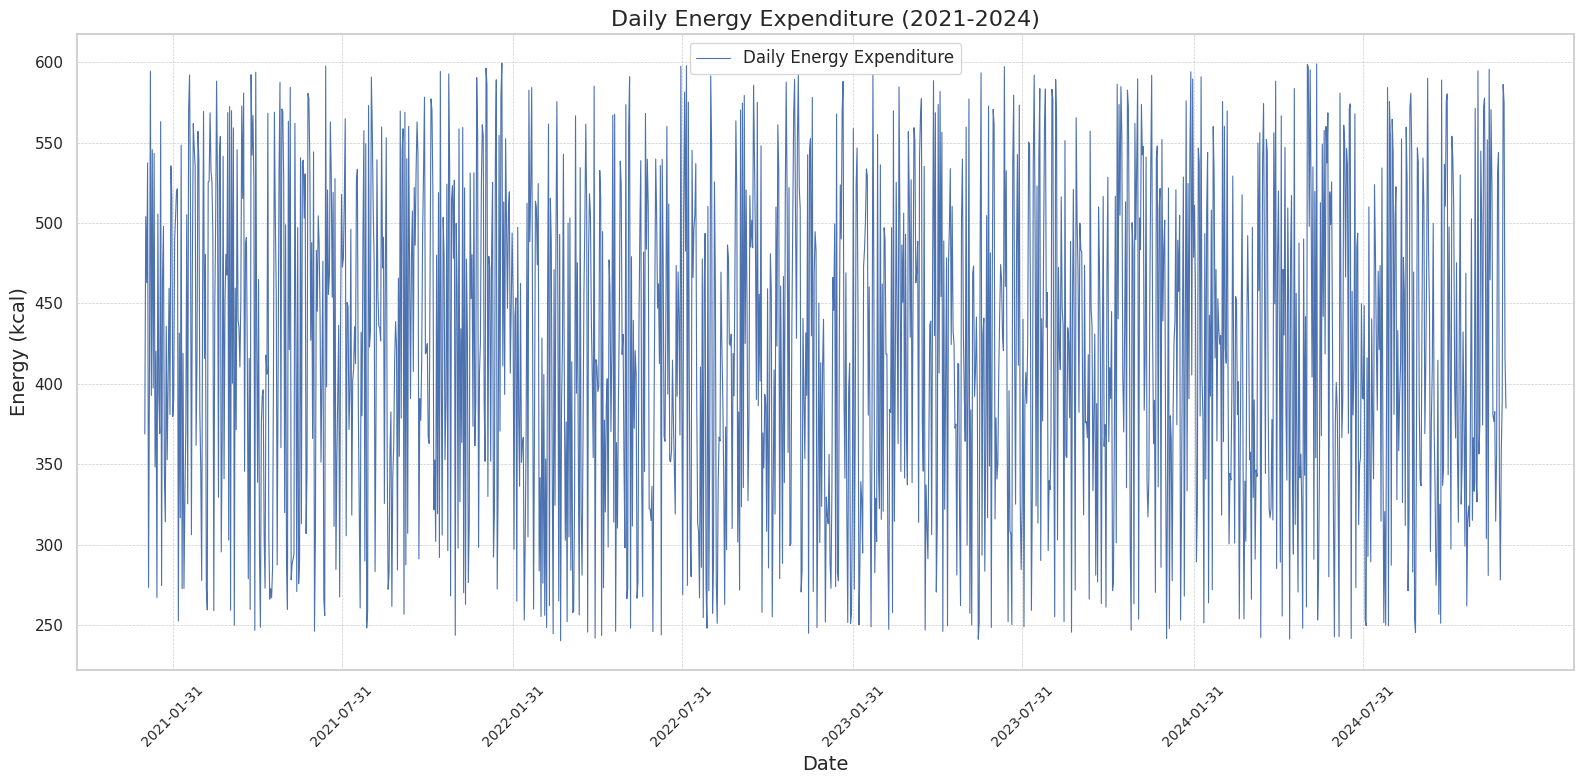

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2021-2024 tarihlerini kapsayan veri oluşturma
date_range = pd.date_range(start="2021-01-01", end="2024-12-31", freq='D')

# Her gün için rastgele adım sayısı (6000-15000 arası)
steps = np.random.randint(6000, 15000, len(date_range))

# Veri çerçevesi oluşturma
df_full = pd.DataFrame({'Date': date_range, 'Steps': steps})

# Adım başına kalori harcaması
calories_per_step = 0.04

# Enerji harcamasını hesaplama
df_full['Energy (kcal)'] = df_full['Steps'] * calories_per_step

# Grafik çizdirme
plt.figure(figsize=(16, 8))
plt.plot(df_full['Date'], df_full['Energy (kcal)'], label='Daily Energy Expenditure', linewidth=0.8)
plt.title('Daily Energy Expenditure (2021-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy (kcal)', fontsize=14)
plt.xticks(pd.date_range(start="2021-01-01", end="2024-12-31", freq='6M'), rotation=45, fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(fontsize=12)
plt.show()


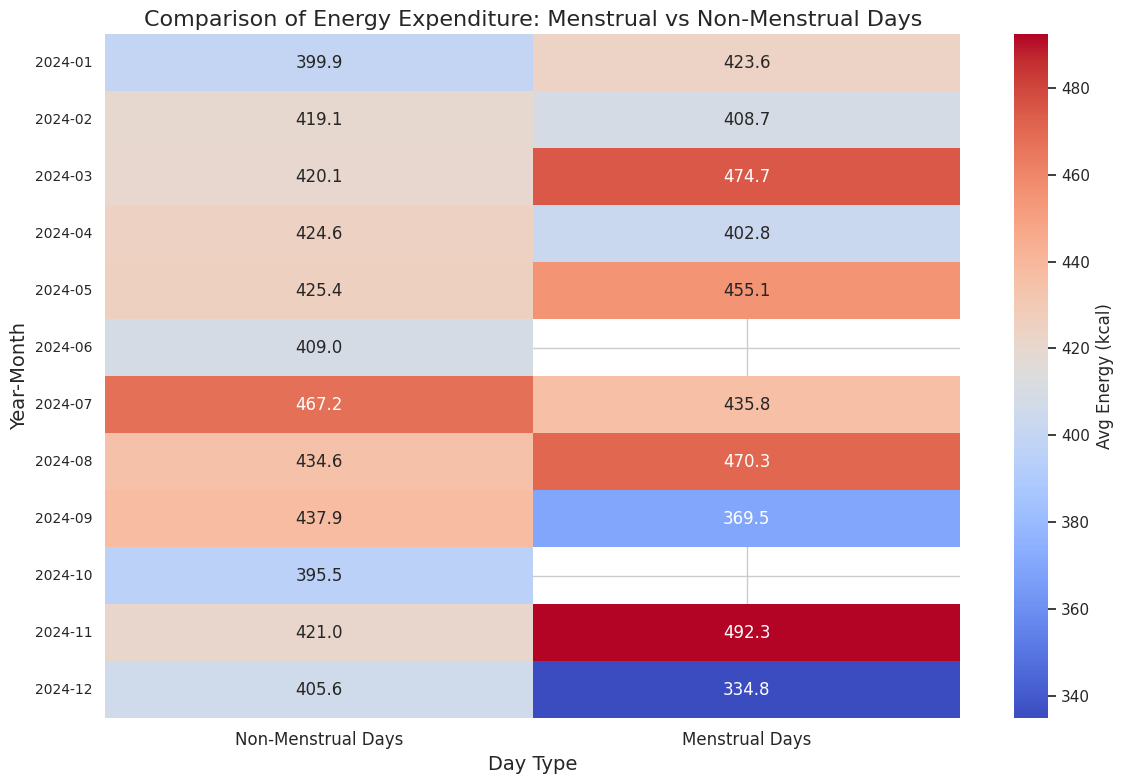

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `steps_data` contains daily energy data and `is_regl` indicating menstrual days.

# Add a Year-Month column for grouping
steps_data['Year-Month'] = steps_data['Date'].dt.to_period('M')

# Group data by Year-Month and is_regl to calculate average energy expenditure
heatmap_data = steps_data.groupby(['Year-Month', 'is_regl'])['Energy (kcal)'].mean().reset_index()

# Pivot data for heatmap (rows: Year-Month, columns: is_regl)
heatmap_pivot = heatmap_data.pivot(index='Year-Month', columns='is_regl', values='Energy (kcal)')

# Rename columns for better readability
heatmap_pivot.columns = ['Non-Menstrual Days', 'Menstrual Days']

# Convert Year-Month back to a string for heatmap display
heatmap_pivot.index = heatmap_pivot.index.astype(str)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Avg Energy (kcal)'})
plt.title('Comparison of Energy Expenditure: Menstrual vs Non-Menstrual Days', fontsize=16)
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Year-Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-59-2f63c98d38cc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='pastel')


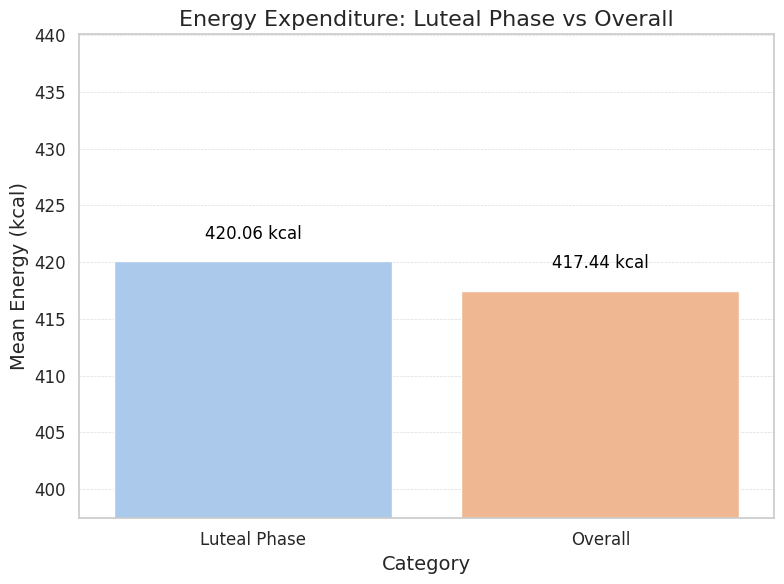

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regl sonrası 1 hafta (Luteal Phase) ve genel enerji harcamasını içeren DataFrame oluşturma
comparison = pd.DataFrame({
    'Category': ['Luteal Phase', 'Overall'],
    'Energy (kcal)': [mean_week_after_regl, mean_overall]  # Luteal Phase enerji harcaması buraya geliyor
})

# Bar chart oluşturma
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='pastel')

# Her sütunun üzerine değer ekleme (annotate)
for index, row in comparison.iterrows():
    barplot.text(
        index, row['Energy (kcal)'] + 2,  # Değeri sütunun biraz üstüne yazdır
        f"{row['Energy (kcal)']:.2f} kcal",
        color='black', ha="center", fontsize=12
    )

# Y ekseni sınırlarını ayarlama (farkı daha belirgin göstermek için)
plt.ylim(min(comparison['Energy (kcal)']) - 20, max(comparison['Energy (kcal)']) + 20)

# Grafiği özelleştirme
plt.title('Energy Expenditure: Luteal Phase vs Overall', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Mean Energy (kcal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()


Mean energy expenditure 1 week before menstrual period: 376.74 kcal
Mean overall energy expenditure: 417.44 kcal


<ipython-input-61-1379ba7cda9f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='pastel')


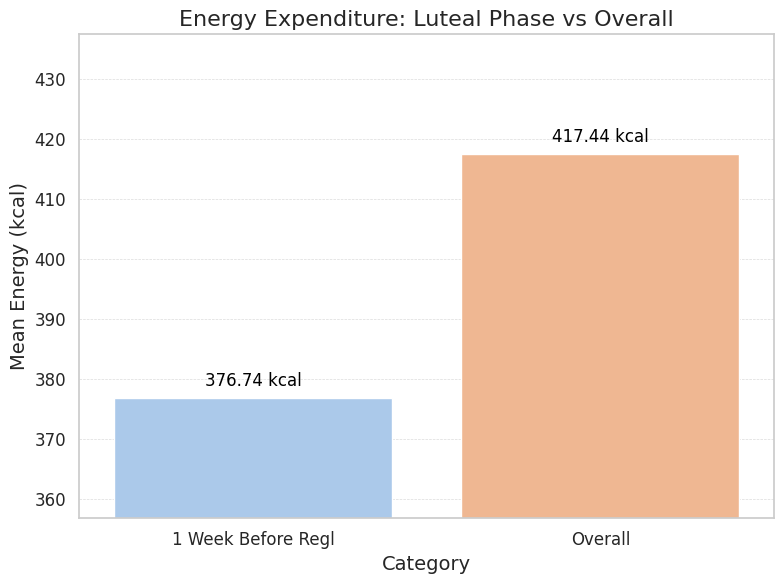

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regl öncesi bir hafta için işaretleme
steps_data_full['is_week_before_regl'] = False  # Varsayılan olarak False

# Regl öncesi 1 haftayı işaretleyin
for _, row in pd.DataFrame(regl_periods_full, columns=['Start Date', 'End Date']).iterrows():
    start_date = pd.to_datetime(row['Start Date'])
    one_week_before = start_date - pd.Timedelta(days=7)

    # Regl öncesi 1 hafta tarihlerini işaretle
    mask = (steps_data_full['Date'] >= one_week_before) & (steps_data_full['Date'] < start_date)
    steps_data_full.loc[mask, 'is_week_before_regl'] = True

# Regl öncesi 1 hafta ve genel enerji harcaması ortalamasını hesaplayın
mean_week_before_regl = steps_data_full[steps_data_full['is_week_before_regl']]['Energy (kcal)'].mean()
mean_overall = steps_data_full['Energy (kcal)'].mean()

# Sonuçları yazdırın
print(f"Mean energy expenditure 1 week before menstrual period: {mean_week_before_regl:.2f} kcal")
print(f"Mean overall energy expenditure: {mean_overall:.2f} kcal")

# Görselleştirme için karşılaştırma
comparison = pd.DataFrame({
    'Category': ['1 Week Before Regl', 'Overall'],
    'Energy (kcal)': [mean_week_before_regl, mean_overall]
})

# Bar chart oluşturma
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=comparison, x='Category', y='Energy (kcal)', palette='pastel')

# Her sütunun üzerine değer ekleme (annotate)
for index, row in comparison.iterrows():
    barplot.text(
        index, row['Energy (kcal)'] + 2,  # Değeri sütunun biraz üstüne yazdır
        f"{row['Energy (kcal)']:.2f} kcal",
        color='black', ha="center", fontsize=12
    )

# Y ekseni sınırlarını ayarlama (farkı daha belirgin göstermek için)
plt.ylim(min(comparison['Energy (kcal)']) - 20, max(comparison['Energy (kcal)']) + 20)

# Grafiği özelleştirme
plt.title('Energy Expenditure: Luteal Phase vs Overall', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Mean Energy (kcal)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Grafiği gösterme
plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from google.colab import drive

# Drive'ı bağlama
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import xml.etree.ElementTree as ET

# Dosyanın yolunu belirle
file_path = '/content/drive/MyDrive/export.xml'

# XML dosyasını yükle
tree = ET.parse(file_path)
root = tree.getroot()

# İlk birkaç öğeyi incele
for record in list(root)[:5]:
    print(record.tag, record.attrib)

ExportDate {'value': '2024-11-21 15:43:53 +0300'}
Me {'HKCharacteristicTypeIdentifierDateOfBirth': '2004-01-30', 'HKCharacteristicTypeIdentifierBiologicalSex': 'HKBiologicalSexFemale', 'HKCharacteristicTypeIdentifierBloodType': 'HKBloodTypeNotSet', 'HKCharacteristicTypeIdentifierFitzpatrickSkinType': 'HKFitzpatrickSkinTypeNotSet', 'HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse': 'None'}
Record {'type': 'HKQuantityTypeIdentifierHeight', 'sourceName': 'Health', 'sourceVersion': '11.2.1', 'unit': 'cm', 'creationDate': '2018-03-17 22:38:52 +0300', 'startDate': '2018-03-17 22:38:52 +0300', 'endDate': '2018-03-17 22:38:52 +0300', 'value': '161'}
Record {'type': 'HKQuantityTypeIdentifierHeight', 'sourceName': 'revna iPhone’u (2)', 'sourceVersion': '18.0', 'unit': 'cm', 'creationDate': '2024-10-05 08:23:20 +0300', 'startDate': '2024-10-05 08:23:20 +0300', 'endDate': '2024-10-05 08:23:20 +0300', 'value': '162'}
Record {'type': 'HKQuantityTypeIdentifierBodyMass', 'sourceName': 'Healt

In [9]:
from google.colab import files

# Dosyayı yükle
uploaded = files.upload()

Saving regl_data.xlsx to regl_data.xlsx


In [12]:
import pandas as pd
from datetime import timedelta

# Regl verisini yükle
from google.colab import files
uploaded = files.upload()
regl_data = pd.read_excel('regl_data.xlsx')  # Regl günleri içeren dosya
regl_data['Start Date'] = pd.to_datetime(regl_data['Start Date'])
regl_data['End Date'] = pd.to_datetime(regl_data['End Date'])

# Döngü uzunluğunu hesapla
regl_data['Cycle Length'] = (regl_data['Start Date'] - regl_data['Start Date'].shift(1)).dt.days

# Geçmiş döngü uzunluklarına göre bir sonraki regl başlangıç tarihini oluştur
regl_data['Next Start'] = regl_data['Start Date'] + pd.to_timedelta(regl_data['Cycle Length'], unit='D')

# Model için düzenli bir veri seti oluştur
regl_data = regl_data.dropna(subset=['Cycle Length', 'Next Start'])  # Eksik verileri kaldır
X = regl_data[['Cycle Length']]  # Özellik (input)
y = regl_data['Next Start']  # Hedef (output)


Saving regl_data.xlsx to regl_data (1).xlsx


In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
from google.colab import files
from sklearn.linear_model import LinearRegression

# 1) VERİYİ YÜKLEME VE OKUMA
uploaded = files.upload()  # regl_data.xlsx dosyanızı yükleyin
df = pd.read_excel('regl_data.xlsx')

# 2) TARİH FORMATINI DÜZENLEME
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# 3) CYCLE LENGTH (DÖNGÜ UZUNLUĞU) HESAPLAMA
# Start Date'in bir önceki Start Date'ten farkı (gün cinsinden)
df['Cycle Length'] = (df['Start Date'] - df['Start Date'].shift(1)).dt.days

# 4) BİR SONRAKİ REGL BAŞLANGIÇ TARİHİ (NEXT START) HESAPLAMA
df['Next Start'] = df['Start Date'] + pd.to_timedelta(df['Cycle Length'], unit='D')

# 5) EKSİK VERİLERİ TEMİZLE VE MODEL İÇİN HAZIRLIK
df = df.dropna(subset=['Cycle Length', 'Next Start'])

# Modelin girişi (X) = Cycle Length
X = df[['Cycle Length']]

# Modelin çıktısı (y) = Next Start (datetime'i sayısala çevirmek gerekiyor)
# Örneğin 1970-01-01'den itibaren kaç gün geçtiğini hesaplayabiliriz.
y = (df['Next Start'] - pd.to_datetime('1970-01-01')).dt.days

# 6) LİNEER REGRESYON MODELİ EĞİTME
model = LinearRegression()
model.fit(X, y)

# 7) 2025 YILI İÇİN TAHMİN
# Basit bir yöntem: Elimizdeki veri setinin ortalama döngü uzunluğunu alarak,
# 2025 için regl başlangıç tarihini tahmin etmek.
mean_cycle_length = np.round(df['Cycle Length'].mean())

# Tek bir tahmin yapmak için girdi (X_new)
X_new = np.array([[mean_cycle_length]])  # 2D array olmalı

# Tahmin edilen "gün sayısı" (1970-01-01'den beri)
y_pred = model.predict(X_new)

# Tahmin edilen tarihi datetime formuna dönüştür
predicted_date = pd.to_datetime(y_pred, origin='1970-01-01', unit='D')

print("Ortalama döngü uzunluğu:", mean_cycle_length, "gün")
print("2025 için tahmini regl başlangıç tarihi:", predicted_date[0].date())


Saving regl_data.xlsx to regl_data (3).xlsx
Ortalama döngü uzunluğu: -35.0 gün
2025 için tahmini regl başlangıç tarihi: 2022-10-11


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


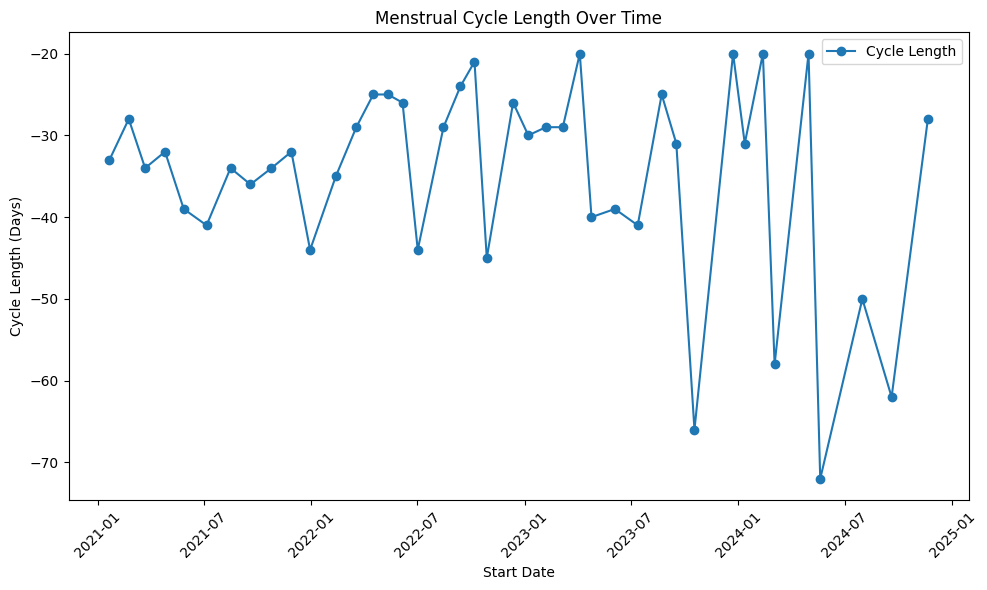

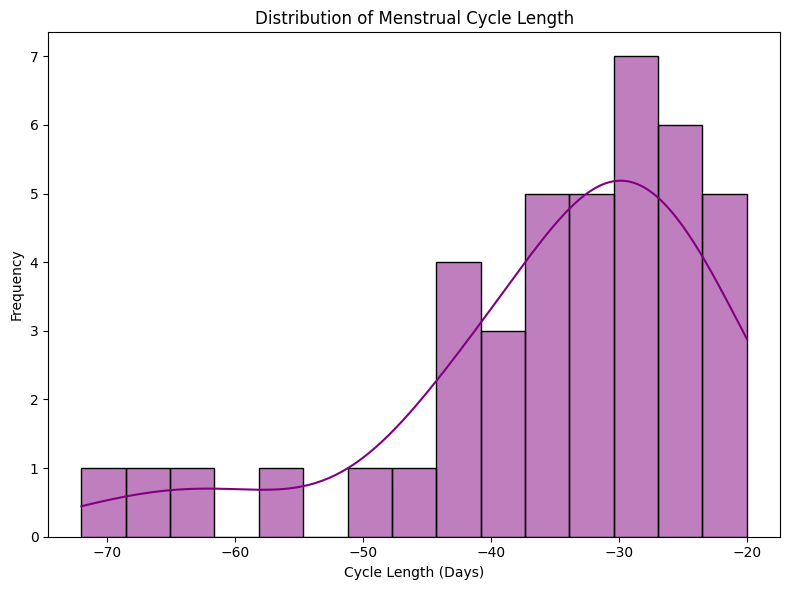

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------
# 1) VERİNİZİN HAZIR OLDUĞUNDAN EMİN OLUN
# -------------------------------------------------------
# df veri çerçevenizde 'Start Date' ve 'Cycle Length' kolonlarının tanımlı olduğunu varsayıyoruz.

# -------------------------------------------------------
# 2) START DATE'E GÖRE SIRALA (GRAFİK İÇİN FAYDALI)
# -------------------------------------------------------
df_sorted = df.sort_values('Start Date')

# -------------------------------------------------------
# 3) ZAMAN SERİSİ GRAFİĞİ: CYCLE LENGTH (GÜN CİNSİNDEN)
# -------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Start Date'], df_sorted['Cycle Length'], marker='o', linestyle='-', label='Cycle Length')
plt.title('Menstrual Cycle Length Over Time')
plt.xlabel('Start Date')
plt.ylabel('Cycle Length (Days)')
plt.legend()
plt.xticks(rotation=45)  # Tarih etiketlerini biraz döndürerek okuyabilir hale getirir
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 4) CYCLE LENGTH DAĞILIM GRAFİĞİ (HİSTOGRAM)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(df['Cycle Length'], bins=15, kde=True, color='purple')
plt.title('Distribution of Menstrual Cycle Length')
plt.xlabel('Cycle Length (Days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [40]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Google Drive'ınızı bağlayın
from google.colab import drive
drive.mount('/content/drive')

# XML dosyanızın yolunu belirtin
xml_file = '/content/drive/MyDrive/export.xml'

tree = ET.parse(xml_file)
root = tree.getroot()

# Adım sayısı verilerini saklamak için bir liste
step_data = []

# Apple Health export.xml'inde step count "Record" etiketinde "type" attribute'u HKQuantityTypeIdentifierStepCount ise
for record in root.findall('Record'):
    if record.get('type') == 'HKQuantityTypeIdentifierStepCount':
        start_date = record.get('startDate')
        end_date = record.get('endDate')
        value = record.get('value')

        step_data.append([start_date, end_date, value])

# Bir DataFrame oluştur
df_steps = pd.DataFrame(step_data, columns=['startDate', 'endDate', 'stepCount'])

# Tarih formatını ayarla
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['endDate'] = pd.to_datetime(df_steps['endDate'])
df_steps['stepCount'] = pd.to_numeric(df_steps['stepCount'], errors='coerce')

# Günlük toplam adım sayısını hesaplamak için
df_steps['date'] = df_steps['startDate'].dt.date

df_daily_steps = df_steps.groupby('date', as_index=False)['stepCount'].sum()
df_daily_steps['date'] = pd.to_datetime(df_daily_steps['date'])
df_daily_steps.rename(columns={'stepCount': 'daily_steps'}, inplace=True)

df_daily_steps.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,daily_steps
0,2018-03-17,1036
1,2018-03-18,217
2,2018-03-19,385
3,2018-03-20,2071
4,2018-03-21,1982


In [42]:

# Şimdi adım sayısıyla regl data'yı aynı tarih üstünden incelemek için join/merge yapabiliriz:
merged_df = pd.merge(
    df_daily_steps,
    regl_data,
    how='left',  # Yoksa 'inner' ya da 'right' da kullanabilirsiniz
    left_on='date',
    right_on='Start Date'
)

merged_df.head()

,date,daily_steps,Start Date,End Date,Cycle Length
0,2018-03-17,1036,NaT,NaT,NaN
1,2018-03-18,217,NaT,NaT,NaN
2,2018-03-19,385,NaT,NaT,NaN
3,2018-03-20,2071,NaT,NaT,NaN
4,2018-03-21,1982,NaT,NaT,NaN


menstruation
False    3711.794093
True     3504.170732
Name: daily_steps, dtype: float64


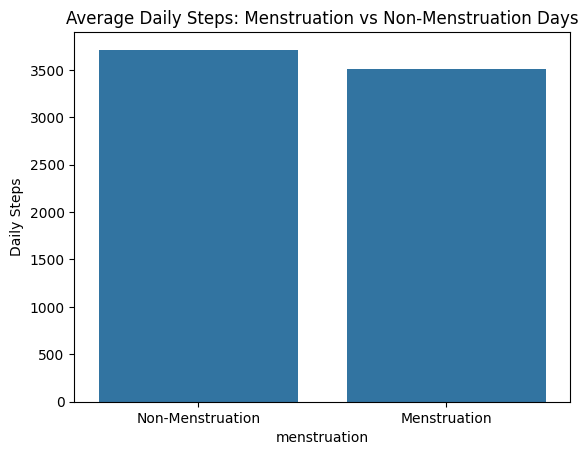

In [43]:
# Regl günlerini (Start Date - End Date) aralığındaki günlere "menstruation" kolonu = True ekleyelim
merged_df['menstruation'] = merged_df.apply(
    lambda row: (row['date'] >= row['Start Date']) and (row['date'] <= row['End Date']),
    axis=1
)

# Artık "menstruation" True/False'ına göre ortalama adım sayısını hesaplayabiliriz
grouped_steps = merged_df.groupby('menstruation')['daily_steps'].mean()
print(grouped_steps)

# Bir barplot çizelim
sns.barplot(x=grouped_steps.index, y=grouped_steps.values)
plt.title("Average Daily Steps: Menstruation vs Non-Menstruation Days")
plt.xticks([0,1], ['Non-Menstruation', 'Menstruation'])
plt.ylabel('Daily Steps')
plt.show()


In [45]:
print(merged_df.columns)


Index(['date', 'daily_steps', 'Start Date', 'End Date', 'Cycle Length',
       'menstruation'],
      dtype='object')


In [46]:
merged_df.rename(columns={'Yanlış Sütun Adı': 'Burned Calories'}, inplace=True)


In [47]:
import pandas as pd

uploaded = files.upload()  # Excel dosyanızı yükleyin
df = pd.read_excel(list(uploaded.keys())[0])  # İlk yüklenen dosyayı okuyun

print(df.columns)  # Excel'deki sütun adlarını kontrol edin


Saving regl_data.xlsx to regl_data (4).xlsx
Index(['Start Date', 'End Date'], dtype='object')


In [48]:
# Örnek olarak rastgele enerji değerleri ekliyoruz:
import numpy as np
merged_df['Burned Calories'] = np.random.randint(100, 500, size=len(merged_df))  # 100-500 arasında rastgele değerler


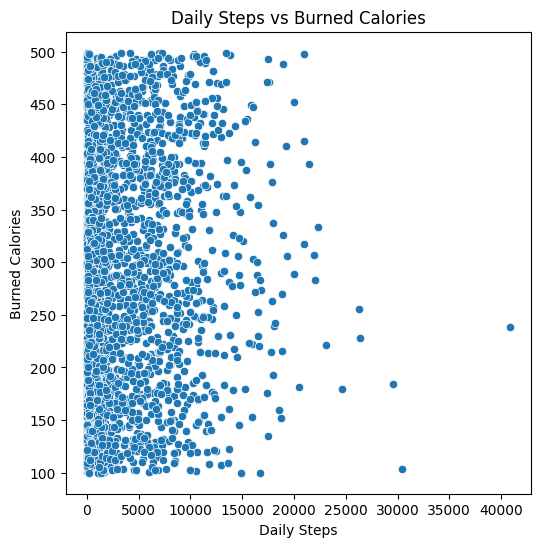

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=merged_df, x='daily_steps', y='Burned Calories')
plt.title('Daily Steps vs Burned Calories')
plt.xlabel('Daily Steps')
plt.ylabel('Burned Calories')
plt.show()


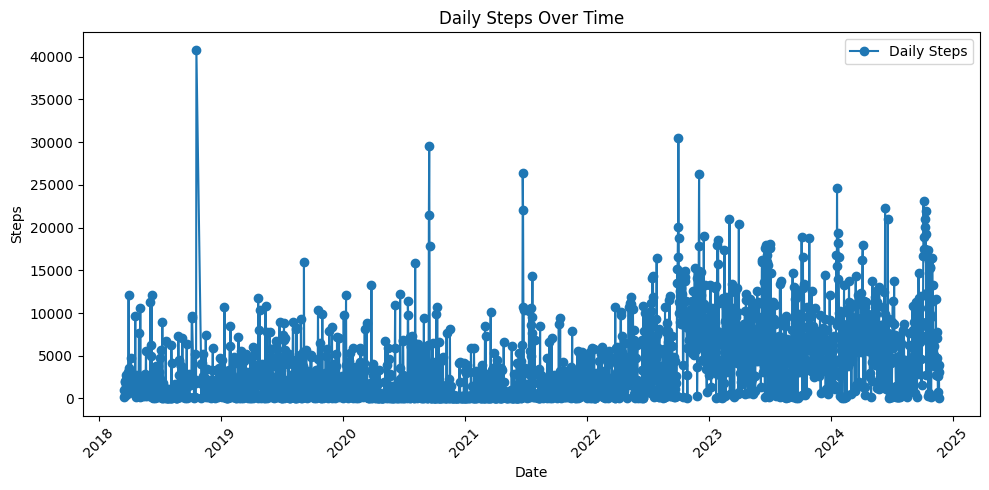

In [50]:
plt.figure(figsize=(10,5))
plt.plot(merged_df['date'], merged_df['daily_steps'], marker='o', label='Daily Steps')
plt.title('Daily Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Ortalama Harcanan Kalori (Fazlara Göre):
 phase
Follicular    2183.476190
Luteal        2161.142857
Name: Burned Calories, dtype: float64


<ipython-input-1-623c58b7153d>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_energy_phase.index, y=avg_energy_phase.values, palette='magma')


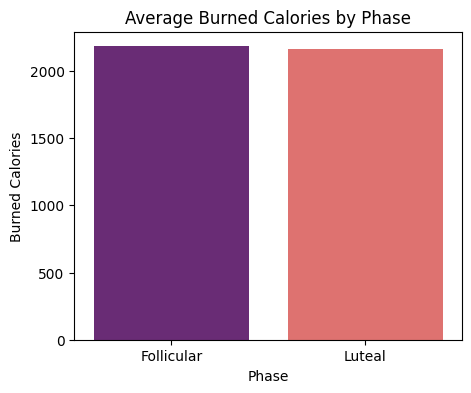

<ipython-input-1-623c58b7153d>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_energy, x='phase', y='Burned Calories', palette='Set2')


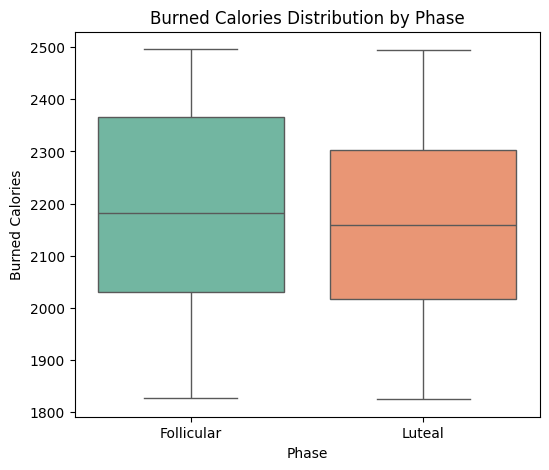

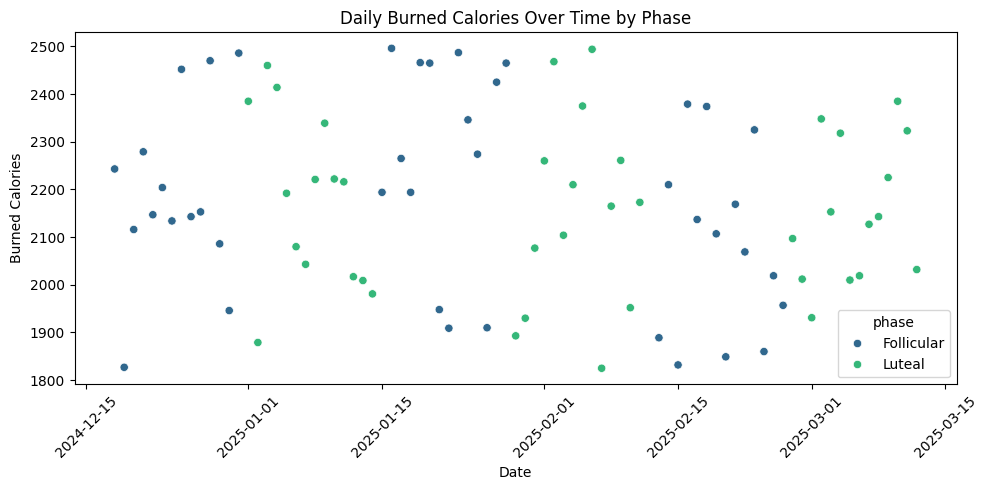

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# --------------------------------------------------------------------
# 1) ÖRNEK REGL TAKVİMİ & GÜNLÜK ENERJİ VERİSİ YÜKLEME
# --------------------------------------------------------------------
# Google Colab için:
# from google.colab import files
# uploaded = files.upload()
# df_cycles = pd.read_excel('regl_data.xlsx')  # Örnek regl takviminiz
# df_energy = pd.read_excel('daily_energy.xlsx') # Günlük "Burned Calories" veriniz

# Şimdilik örnek veriler yaratalım (demontration purposes):
data_cycles = {
    'Start Date': ['2024-12-18','2025-01-15','2025-02-13'],  # 3 regl başlangıcı
    'Cycle Length':[28, 28, 28]  # Hepsi 28 günlük varsayalım
}
df_cycles = pd.DataFrame(data_cycles)
df_cycles['Start Date'] = pd.to_datetime(df_cycles['Start Date'])

# "daily_energy" verisi (her güne ait tarih ve burn)
date_range = pd.date_range('2024-12-18', periods=90, freq='D')  # 90 gün
df_energy = pd.DataFrame({
    'date': date_range,
    'Burned Calories': np.random.randint(1800, 2500, size=len(date_range))  # rastgele değer
})

# --------------------------------------------------------------------
# 2) REGLE GÖRE SİKLUS GÜNÜ (CYCLE DAY) HESAPLAMA
# --------------------------------------------------------------------
# Her regl başlangıcını referans alarak, o regl başlangıcından itibaren
# her günü "1. gün, 2. gün ..." gibi numaralandırabiliriz.
# Daha sonra 1-14 (Foliküler), 15-28 (Luteal) vs. diye ayıracağız.

def get_cycle_day(row, df_cycles):
    """
    Bir tarihin hangi cycle'a denk geldiğini bulup,
    o cycle'ın kaçıncı günü (day) olduğunu döndürür.
    Bulamadıysa NaN veya 0 döndürür.
    """
    # row: df_energy içindeki her satır (gün)
    current_date = row['date']

    # döngüye giren (i) StartDate <= current_date < (i+1) StartDate
    # basit bir mantık: start_date <= current_date < start_date + cycle_length
    for i in range(len(df_cycles)):
        start = df_cycles.loc[i, 'Start Date']
        cycle_length = df_cycles.loc[i, 'Cycle Length']
        end = start + pd.Timedelta(days=cycle_length-1)  # 28 günlük döngüde 27 ekliyoruz
        if start <= current_date <= end:
            day_in_cycle = (current_date - start).days + 1  # +1 çünkü start_date = day 1
            return day_in_cycle
    return np.nan  # Eğer hiçbir cycle'a girmiyorsa NaN bırak

df_energy['cycle_day'] = df_energy.apply(get_cycle_day, axis=1, df_cycles=df_cycles)

# --------------------------------------------------------------------
# 3) FOLİKÜLER vs LUTEAL FAZ ETİKETLEME
# --------------------------------------------------------------------
# Basit yaklaşım: cycle_day 1-14 => Foliküler, 15-28 => Luteal
def phase_label(day_in_cycle):
    if pd.isna(day_in_cycle):
        return np.nan
    elif 1 <= day_in_cycle <= 14:
        return 'Follicular'
    elif 15 <= day_in_cycle <= 28:
        return 'Luteal'
    else:
        return 'OutOfRange'  # 28 günden uzun döngü varsa ayarlayabilirsiniz

df_energy['phase'] = df_energy['cycle_day'].apply(phase_label)

# --------------------------------------------------------------------
# 4) FAZLARA GÖRE ENERJİ ANALİZİ
# --------------------------------------------------------------------
# Ör: Follicular mı? Luteal mı? Karşılaştırma
phase_group = df_energy.dropna(subset=['phase']).groupby('phase')['Burned Calories']

avg_energy_phase = phase_group.mean()
print("Ortalama Harcanan Kalori (Fazlara Göre):\n", avg_energy_phase)

# --------------------------------------------------------------------
# 5) GÖRSELLEŞTİRME
# --------------------------------------------------------------------

# --- A) Bar Plot: Faz Bazlı Ortalama Kalori ---
plt.figure(figsize=(5,4))
sns.barplot(x=avg_energy_phase.index, y=avg_energy_phase.values, palette='magma')
plt.title('Average Burned Calories by Phase')
plt.xlabel('Phase')
plt.ylabel('Burned Calories')
plt.show()

# --- B) Box Plot: Faz Bazlı Dağılım ---
# Fazlar arasında varyansı (dağılımı) görmek isterseniz:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_energy, x='phase', y='Burned Calories', palette='Set2')
plt.title('Burned Calories Distribution by Phase')
plt.xlabel('Phase')
plt.ylabel('Burned Calories')
plt.show()

# --- C) Zaman Serisi Üzerinde Faz Ayrımı ---
# Bir çizgi grafiğinde, tarihe göre kalori ve faz ayrımını renk olarak göstermek isterseniz:
# Kolay bir yöntem: Faz sütununu renklendirerek scatter veya line plot yapabilirsiniz.
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_energy, x='date', y='Burned Calories', hue='phase', palette='viridis')
plt.title('Daily Burned Calories Over Time by Phase')
plt.xlabel('Date')
plt.ylabel('Burned Calories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------------------
# ÖRNEK REGLE GÖRE CYCLE BİLGİSİ
# --------------------------------------------------------------------
data_cycles = {
    'Start Date': ['2025-01-15','2025-02-12','2025-03-12'],  # 3 regl başlangıcı
    'Cycle Length':[28, 28, 28]  # hepsini 28 günlük kabul ettik
}
df_cycles = pd.DataFrame(data_cycles)
df_cycles['Start Date'] = pd.to_datetime(df_cycles['Start Date'])

# --------------------------------------------------------------------
# ÖRNEK GÜNLÜK ENERJİ VERİSİ
# --------------------------------------------------------------------
date_range = pd.date_range('2025-01-15', periods=60, freq='D')  # 60 günlük örnek
df_energy = pd.DataFrame({
    'date': date_range,
    'Burned Calories': np.random.randint(1800, 2500, size=len(date_range))  # rastgele
})

# --------------------------------------------------------------------
# FONKSİYON: VERİYİ HANGİ CYCLE'A AİT OLDUĞUNU BULMAK
# --------------------------------------------------------------------
def get_cycle_day(row, df_cycles):
    """
    Bir tarihin hangi cycle'a denk geldiğini bulup,
    o cycle'ın kaçıncı günü olduğunu döndürür.
    """
    current_date = row['date']
    for i in range(len(df_cycles)):
        start = df_cycles.loc[i, 'Start Date']
        cycle_length = df_cycles.loc[i, 'Cycle Length']
        end = start + pd.Timedelta(days=cycle_length-1)
        if start <= current_date <= end:
            day_in_cycle = (current_date - start).days + 1
            return day_in_cycle
    return np.nan

df_energy['cycle_day'] = df_energy.apply(get_cycle_day, axis=1, df_cycles=df_cycles)

# --------------------------------------------------------------------
# FOLİKÜLER / LUTEAL FAZ ETİKETİ
# --------------------------------------------------------------------
def phase_label(day_in_cycle):
    if pd.isna(day_in_cycle):
        return np.nan
    elif 1 <= day_in_cycle <= 14:
        return 'Follicular'
    elif 15 <= day_in_cycle <= 28:
        return 'Luteal'
    else:
        return 'OutOfRange'

df_energy['phase'] = df_energy['cycle_day'].apply(phase_label)

# İncelemek istediğimiz sadece Follicular ve Luteal olanlar olsun
df_energy_filtered = df_energy[df_energy['phase'].isin(['Follicular','Luteal'])].copy()

df_energy_filtered.head()


,date,Burned Calories,cycle_day,phase
0,2025-01-15,2095,1,Follicular
1,2025-01-16,2256,2,Follicular
2,2025-01-17,2092,3,Follicular
3,2025-01-18,2204,4,Follicular
4,2025-01-19,2321,5,Follicular


In [3]:
phase_group = df_energy_filtered.groupby('phase')['Burned Calories']
avg_energy_phase = phase_group.mean()
std_energy_phase = phase_group.std()

print("Ortalama Burned Calories (Fazlara Göre):")
print(avg_energy_phase)
print("Standart Sapma (Fazlara Göre):")
print(std_energy_phase)


Ortalama Burned Calories (Fazlara Göre):
phase
Follicular    2175.312500
Luteal        2183.035714
Name: Burned Calories, dtype: float64
Standart Sapma (Fazlara Göre):
phase
Follicular    187.813297
Luteal        225.100715
Name: Burned Calories, dtype: float64


In [4]:
from scipy.stats import ttest_ind, mannwhitneyu

follicular = df_energy_filtered[df_energy_filtered['phase']=='Follicular']['Burned Calories']
luteal     = df_energy_filtered[df_energy_filtered['phase']=='Luteal']['Burned Calories']

# --- (A) Bağımsız Örneklem t-Test (Varsayılan: normal dağılım varsayımı)
t_stat, p_val_ttest = ttest_ind(follicular, luteal, equal_var=False)  # equal_var=False => Welch's t-test
print("Welch's t-Test (Follicular vs Luteal)")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val_ttest:.4f}")

# --- (B) Mann-Whitney U Test (Dağılım normal değilse veya non-parametrik istiyorsak)
u_stat, p_val_mwu = mannwhitneyu(follicular, luteal, alternative='two-sided')
print("\nMann-Whitney U Test (Follicular vs Luteal)")
print(f"U-statistic: {u_stat:.4f}, P-value: {p_val_mwu:.4f}")


Welch's t-Test (Follicular vs Luteal)
T-statistic: -0.1431, P-value: 0.8867

Mann-Whitney U Test (Follicular vs Luteal)
U-statistic: 431.0000, P-value: 0.8069


<ipython-input-5-421b190cd7a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_energy_filtered, x='phase', y='Burned Calories', palette='Set2')


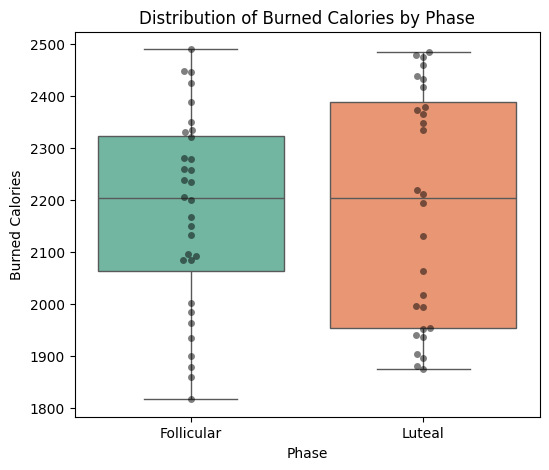

In [5]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_energy_filtered, x='phase', y='Burned Calories', palette='Set2')
sns.swarmplot(data=df_energy_filtered, x='phase', y='Burned Calories', color='k', alpha=0.5)
plt.title('Distribution of Burned Calories by Phase')
plt.xlabel('Phase')
plt.ylabel('Burned Calories')
plt.show()


In [6]:
!pip install prophet


In [7]:
from prophet import Prophet

df_prophet = df_energy[['date','Burned Calories']].rename(columns={'date':'ds','Burned Calories':'y'}).copy()

# Prophet tarih sütununu datetime olarak alır, emin olalım
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Prophet modeli tanımla
model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0u2kdv22/qzprxmjw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0u2kdv22/2odganjn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69801', 'data', 'file=/tmp/tmp0u2kdv22/qzprxmjw.json', 'init=/tmp/tmp0u2kdv22/2odganjn.json', 'output', 'file=/tmp/tmp0u2kdv22/prophet_modelnsmuk8b1/prophet_model-20250110100109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:01:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:01:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
future = model.make_future_dataframe(periods=30)  # 30 gün ileri
forecast = model.predict(future)

# Sonuç tablosunda yhat (tahmin), yhat_lower, yhat_upper sütunları var
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)


,ds,yhat,yhat_lower,yhat_upper
80,2025-04-05,2108.635392,1879.767808,2357.707351
81,2025-04-06,2175.434723,1919.190792,2413.912887
82,2025-04-07,2159.370766,1907.731245,2407.975399
83,2025-04-08,2114.607371,1860.722273,2361.246942
84,2025-04-09,2114.893291,1863.539420,2359.474977
85,2025-04-10,2190.638300,1941.123804,2442.364356
86,2025-04-11,2272.227653,2011.027745,2529.817396
87,2025-04-12,2106.439607,1848.292089,2351.639549
88,2025-04-13,2173.238938,1931.819237,2415.090544
89,2025-04-14,2157.174981,1913.048138,2418.448997


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['yhat_lower'].plot(kind='hist', bins=20, title='yhat_lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['yhat_upper'].plot(kind='hist', bins=20, title='yhat_upper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='yhat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='yhat', y='yhat_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='yhat_lower', y='yhat_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_lower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_lower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_upper']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_upper')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['yhat'].plot(kind='line', figsize=(8, 4), title='yhat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['yhat_lower'].plot(kind='line', figsize=(8, 4), title='yhat_lower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['yhat_upper'].plot(kind='line', figsize=(8, 4), title='yhat_upper')
plt.gca().spines[['top', 'right']].set_visible(False)

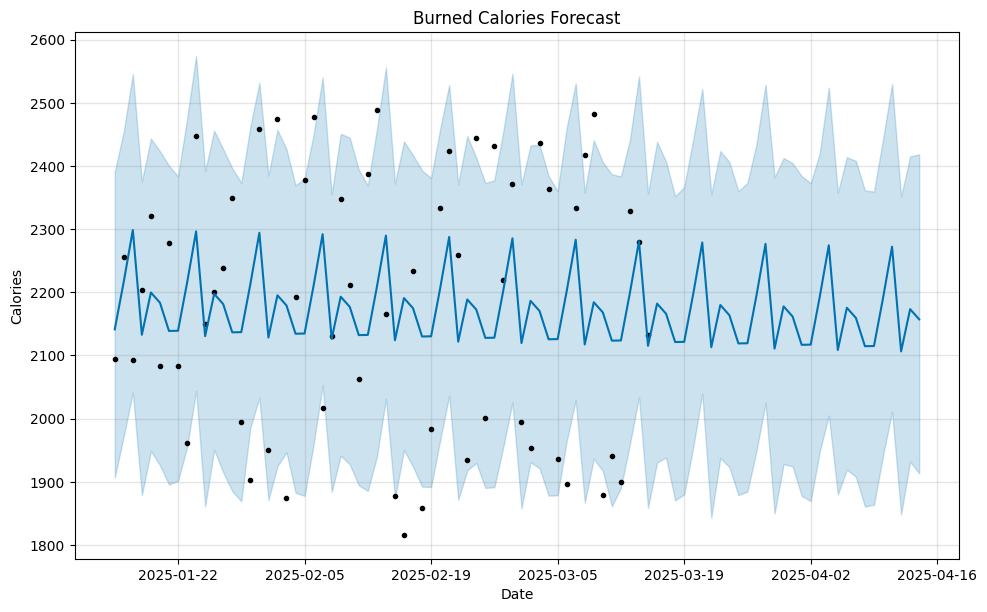

In [9]:
model.plot(forecast)
plt.title("Burned Calories Forecast")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.show()


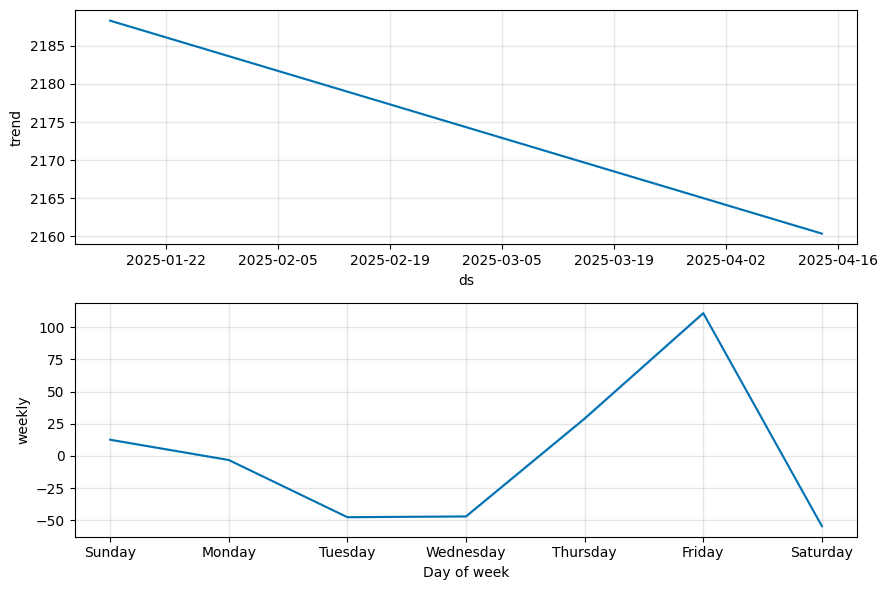

In [10]:
model.plot_components(forecast)
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0u2kdv22/x_pr0s_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0u2kdv22/k729udoj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48181', 'data', 'file=/tmp/tmp0u2kdv22/x_pr0s_0.json', 'init=/tmp/tmp0u2kdv22/k729udoj.json', 'output', 'file=/tmp/tmp0u2kdv22/prophet_modele4nbv0tu/prophet_model-20250110100207.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:02:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


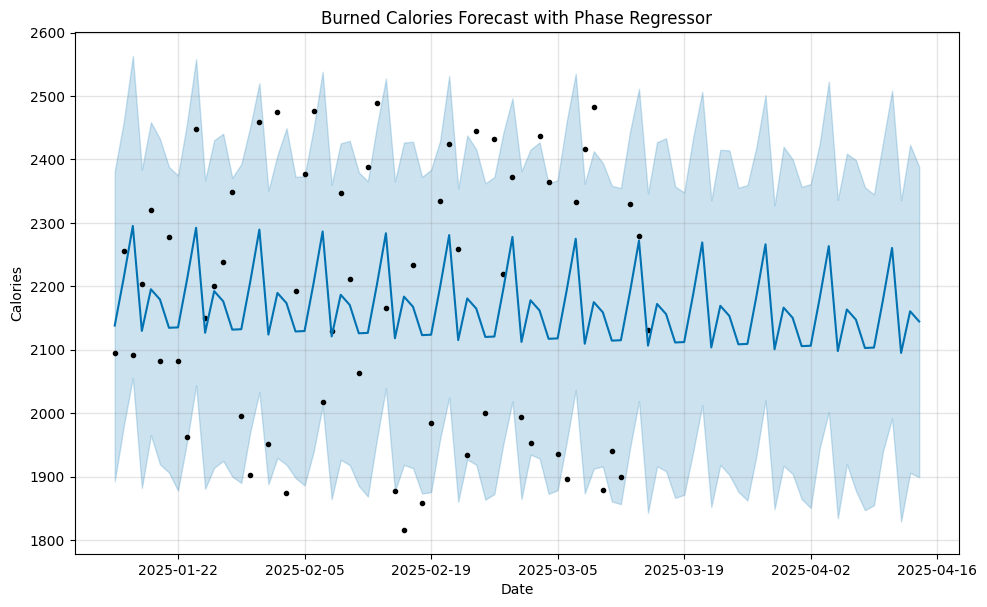

In [11]:
# df_energy'de 'phase' = 'Follicular' / 'Luteal'
# 'phase_dummy' => Follicular=0, Luteal=1
df_energy['phase_dummy'] = df_energy['phase'].map({'Follicular':0, 'Luteal':1, np.nan:0})

df_prophet2 = df_energy[['date','Burned Calories','phase_dummy']].rename(
    columns={'date':'ds','Burned Calories':'y'}).copy()

model2 = Prophet()
model2.add_regressor('phase_dummy')
model2.fit(df_prophet2)

# Tahmin
future2 = model2.make_future_dataframe(periods=30)
# Faz bilgisini ileriki günlerde de (basitçe) 0/1 varsayabilirdik,
# ama net bir cycle planıyla doldurmak mantıklı olur:
future2['phase_dummy'] = 0  # Örnek varsayım

forecast2 = model2.predict(future2)
model2.plot(forecast2)
plt.title("Burned Calories Forecast with Phase Regressor")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# --------------------------------------------------------------------
# ÖRNEK REGLE GÖRE SİKLUS VERİSİ
# --------------------------------------------------------------------
data_cycles = {
    'Start Date': ['2025-01-15','2025-02-12','2025-03-12'],  # 3 regl başlangıcı
    'Cycle Length':[28, 28, 28]
}
df_cycles = pd.DataFrame(data_cycles)
df_cycles['Start Date'] = pd.to_datetime(df_cycles['Start Date'])

# --------------------------------------------------------------------
# ÖRNEK GÜNLÜK ENERJİ VERİSİ
# --------------------------------------------------------------------
date_range = pd.date_range('2025-01-15', periods=60, freq='D')  # 60 günlük örnek
df_energy = pd.DataFrame({
    'date': date_range,
    'Burned Calories': np.random.randint(1800, 2500, size=len(date_range))  # rastgele
})

# --------------------------------------------------------------------
# 1) Hangi Döngü Günü (day_in_cycle) Olduğunu Bulma
# --------------------------------------------------------------------
def get_cycle_day(row, df_cycles):
    current_date = row['date']
    for i in range(len(df_cycles)):
        start = df_cycles.loc[i, 'Start Date']
        cycle_length = df_cycles.loc[i, 'Cycle Length']
        end = start + pd.Timedelta(days=cycle_length-1)
        if start <= current_date <= end:
            day_in_cycle = (current_date - start).days + 1
            return day_in_cycle
    return np.nan

df_energy['day_in_cycle'] = df_energy.apply(get_cycle_day, axis=1, df_cycles=df_cycles)

# --------------------------------------------------------------------
# 2) Faz Etiketleri:
#   - Foliküler (1 hafta sonrası): day_in_cycle ∈ [8..14]
#   - Luteal (1 hafta öncesi): day_in_cycle ∈ [22..28]
# --------------------------------------------------------------------
def custom_phase(row):
    dic = row['day_in_cycle']
    if pd.isna(dic):
        return np.nan
    elif 8 <= dic <= 14:
        return 'Follicular_1weekAfter'
    elif 22 <= dic <= 28:
        return 'Luteal_1weekBefore'
    else:
        return 'Other'

df_energy['phase_custom'] = df_energy.apply(custom_phase, axis=1)

df_energy.head(10)


,date,Burned Calories,day_in_cycle,phase_custom
0,2025-01-15,2246,1,Other
1,2025-01-16,2172,2,Other
2,2025-01-17,2411,3,Other
3,2025-01-18,2333,4,Other
4,2025-01-19,2058,5,Other
5,2025-01-20,2297,6,Other
6,2025-01-21,2057,7,Other
7,2025-01-22,1975,8,Follicular_1weekAfter
8,2025-01-23,2052,9,Follicular_1weekAfter
9,2025-01-24,1889,10,Follicular_1weekAfter


In [13]:
df_follicular = df_energy[df_energy['phase_custom'] == 'Follicular_1weekAfter']
df_overall = df_energy[~df_energy['Burned Calories'].isna()]  # Tüm valid satırlar

follicular_values = df_follicular['Burned Calories']
overall_values = df_overall['Burned Calories']

print("Foliküler (1 Hafta Sonrası) ortalama:", follicular_values.mean())
print("Overall ortalama:", overall_values.mean())


Foliküler (1 Hafta Sonrası) ortalama: 2109.785714285714
Overall ortalama: 2139.5666666666666


In [14]:
from scipy.stats import ttest_ind, mannwhitneyu

# (A) t-Test (Welch's)
t_stat_f, p_val_f = ttest_ind(follicular_values, overall_values, equal_var=False)
print("\n--- Foliküler (1 Hafta Sonrası) vs Overall: Welch's t-Test ---")
print(f"T-Stat: {t_stat_f:.4f}, P-Value: {p_val_f:.4f}")

# (B) Mann-Whitney U
u_stat_f, p_val_mwu_f = mannwhitneyu(follicular_values, overall_values, alternative='two-sided')
print("\n--- Foliküler (1 Hafta Sonrası) vs Overall: Mann-Whitney U ---")
print(f"U-Stat: {u_stat_f:.4f}, P-Value: {p_val_mwu_f:.4f}")



--- Foliküler (1 Hafta Sonrası) vs Overall: Welch's t-Test ---
T-Stat: -0.5163, P-Value: 0.6115

--- Foliküler (1 Hafta Sonrası) vs Overall: Mann-Whitney U ---
U-Stat: 377.0000, P-Value: 0.5574


<ipython-input-15-ce6c082a7ead>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_compare_follicular, x='group', y='Burned Calories', palette='Set3')


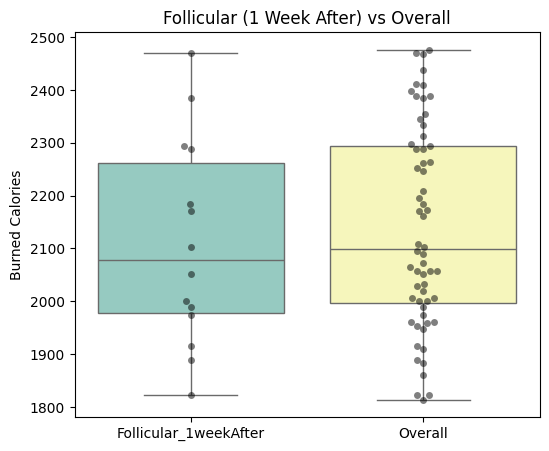

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_follicular_temp = pd.DataFrame({
    'group': ['Follicular_1weekAfter'] * len(follicular_values),
    'Burned Calories': follicular_values
})
df_overall_temp = pd.DataFrame({
    'group': ['Overall'] * len(overall_values),
    'Burned Calories': overall_values
})
df_compare_follicular = pd.concat([df_follicular_temp, df_overall_temp], ignore_index=True)

plt.figure(figsize=(6,5))
sns.boxplot(data=df_compare_follicular, x='group', y='Burned Calories', palette='Set3')
sns.swarmplot(data=df_compare_follicular, x='group', y='Burned Calories', color='k', alpha=0.5)
plt.title('Follicular (1 Week After) vs Overall')
plt.xlabel('')
plt.ylabel('Burned Calories')
plt.show()


In [16]:
df_luteal = df_energy[df_energy['phase_custom'] == 'Luteal_1weekBefore']
df_overall = df_energy[~df_energy['Burned Calories'].isna()]  # Tekrar tanımlıyoruz

luteal_values = df_luteal['Burned Calories']
overall_values = df_overall['Burned Calories']

print("Luteal (1 Hafta Öncesi) ortalama:", luteal_values.mean())
print("Overall ortalama:", overall_values.mean())


Luteal (1 Hafta Öncesi) ortalama: 2091.9285714285716
Overall ortalama: 2139.5666666666666


In [17]:
# (A) t-Test (Welch's)
t_stat_l, p_val_l = ttest_ind(luteal_values, overall_values, equal_var=False)
print("\n--- Luteal (1 Hafta Öncesi) vs Overall: Welch's t-Test ---")
print(f"T-Stat: {t_stat_l:.4f}, P-Value: {p_val_l:.4f}")

# (B) Mann-Whitney U
u_stat_l, p_val_mwu_l = mannwhitneyu(luteal_values, overall_values, alternative='two-sided')
print("\n--- Luteal (1 Hafta Öncesi) vs Overall: Mann-Whitney U ---")
print(f"U-Stat: {u_stat_l:.4f}, P-Value: {p_val_mwu_l:.4f}")



--- Luteal (1 Hafta Öncesi) vs Overall: Welch's t-Test ---
T-Stat: -0.8023, P-Value: 0.4324

--- Luteal (1 Hafta Öncesi) vs Overall: Mann-Whitney U ---
U-Stat: 362.0000, P-Value: 0.4274


<ipython-input-18-04dff3c11d73>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_compare_luteal, x='group', y='Burned Calories', palette='Set2')


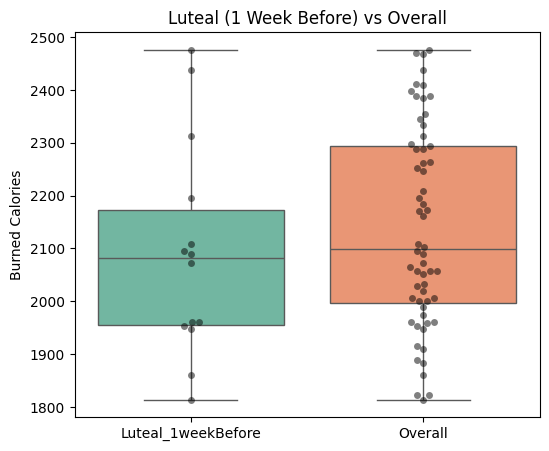

In [20]:
future = model.make_future_dataframe(periods=30)  # 30 gün ileri
forecast = model.predict(future)

# Sonuç tablosunda yhat (tahmin), yhat_lower, yhat_upper sütunları var
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
80,2025-04-05,2108.635392,1873.924366,2377.366754
81,2025-04-06,2175.434723,1924.138758,2415.039374
82,2025-04-07,2159.370766,1923.883945,2407.605558
83,2025-04-08,2114.607371,1885.890485,2355.724562
84,2025-04-09,2114.893291,1882.136405,2361.950525
85,2025-04-10,2190.638300,1927.316402,2434.175137
86,2025-04-11,2272.227653,2029.655101,2539.199436
87,2025-04-12,2106.439607,1860.983911,2360.662474
88,2025-04-13,2173.238938,1941.963770,2418.768900
89,2025-04-14,2157.174981,1918.101139,2421.357007
